## Визуализация с `matplotlib`: часть 2

*Алла Тамбовцева, НИУ ВШЭ*

На этом занятии мы продолжим работать с данными по температуре воздуха в Рио-де-Жанейро, но рассмотрим другой тип графиков – гистограмму, а также обсудим построение графиков по группам. 

Для начала импортируем необходимые библиотеки и модули:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Загрузим данные и заполним пропущенные значения (как на прошлом занятии):

In [2]:
df = pd.read_csv("station_rio.csv")

In [3]:
df = df.replace(to_replace = 999.9, value = None) 
df = df.fillna(method = "ffill") 

### Построение гистограммы и добавление вертикальных линий на график

Построим базовую гистограмму для температуры воздуха в ноябре, воспользовавшись методом `.hist()`:

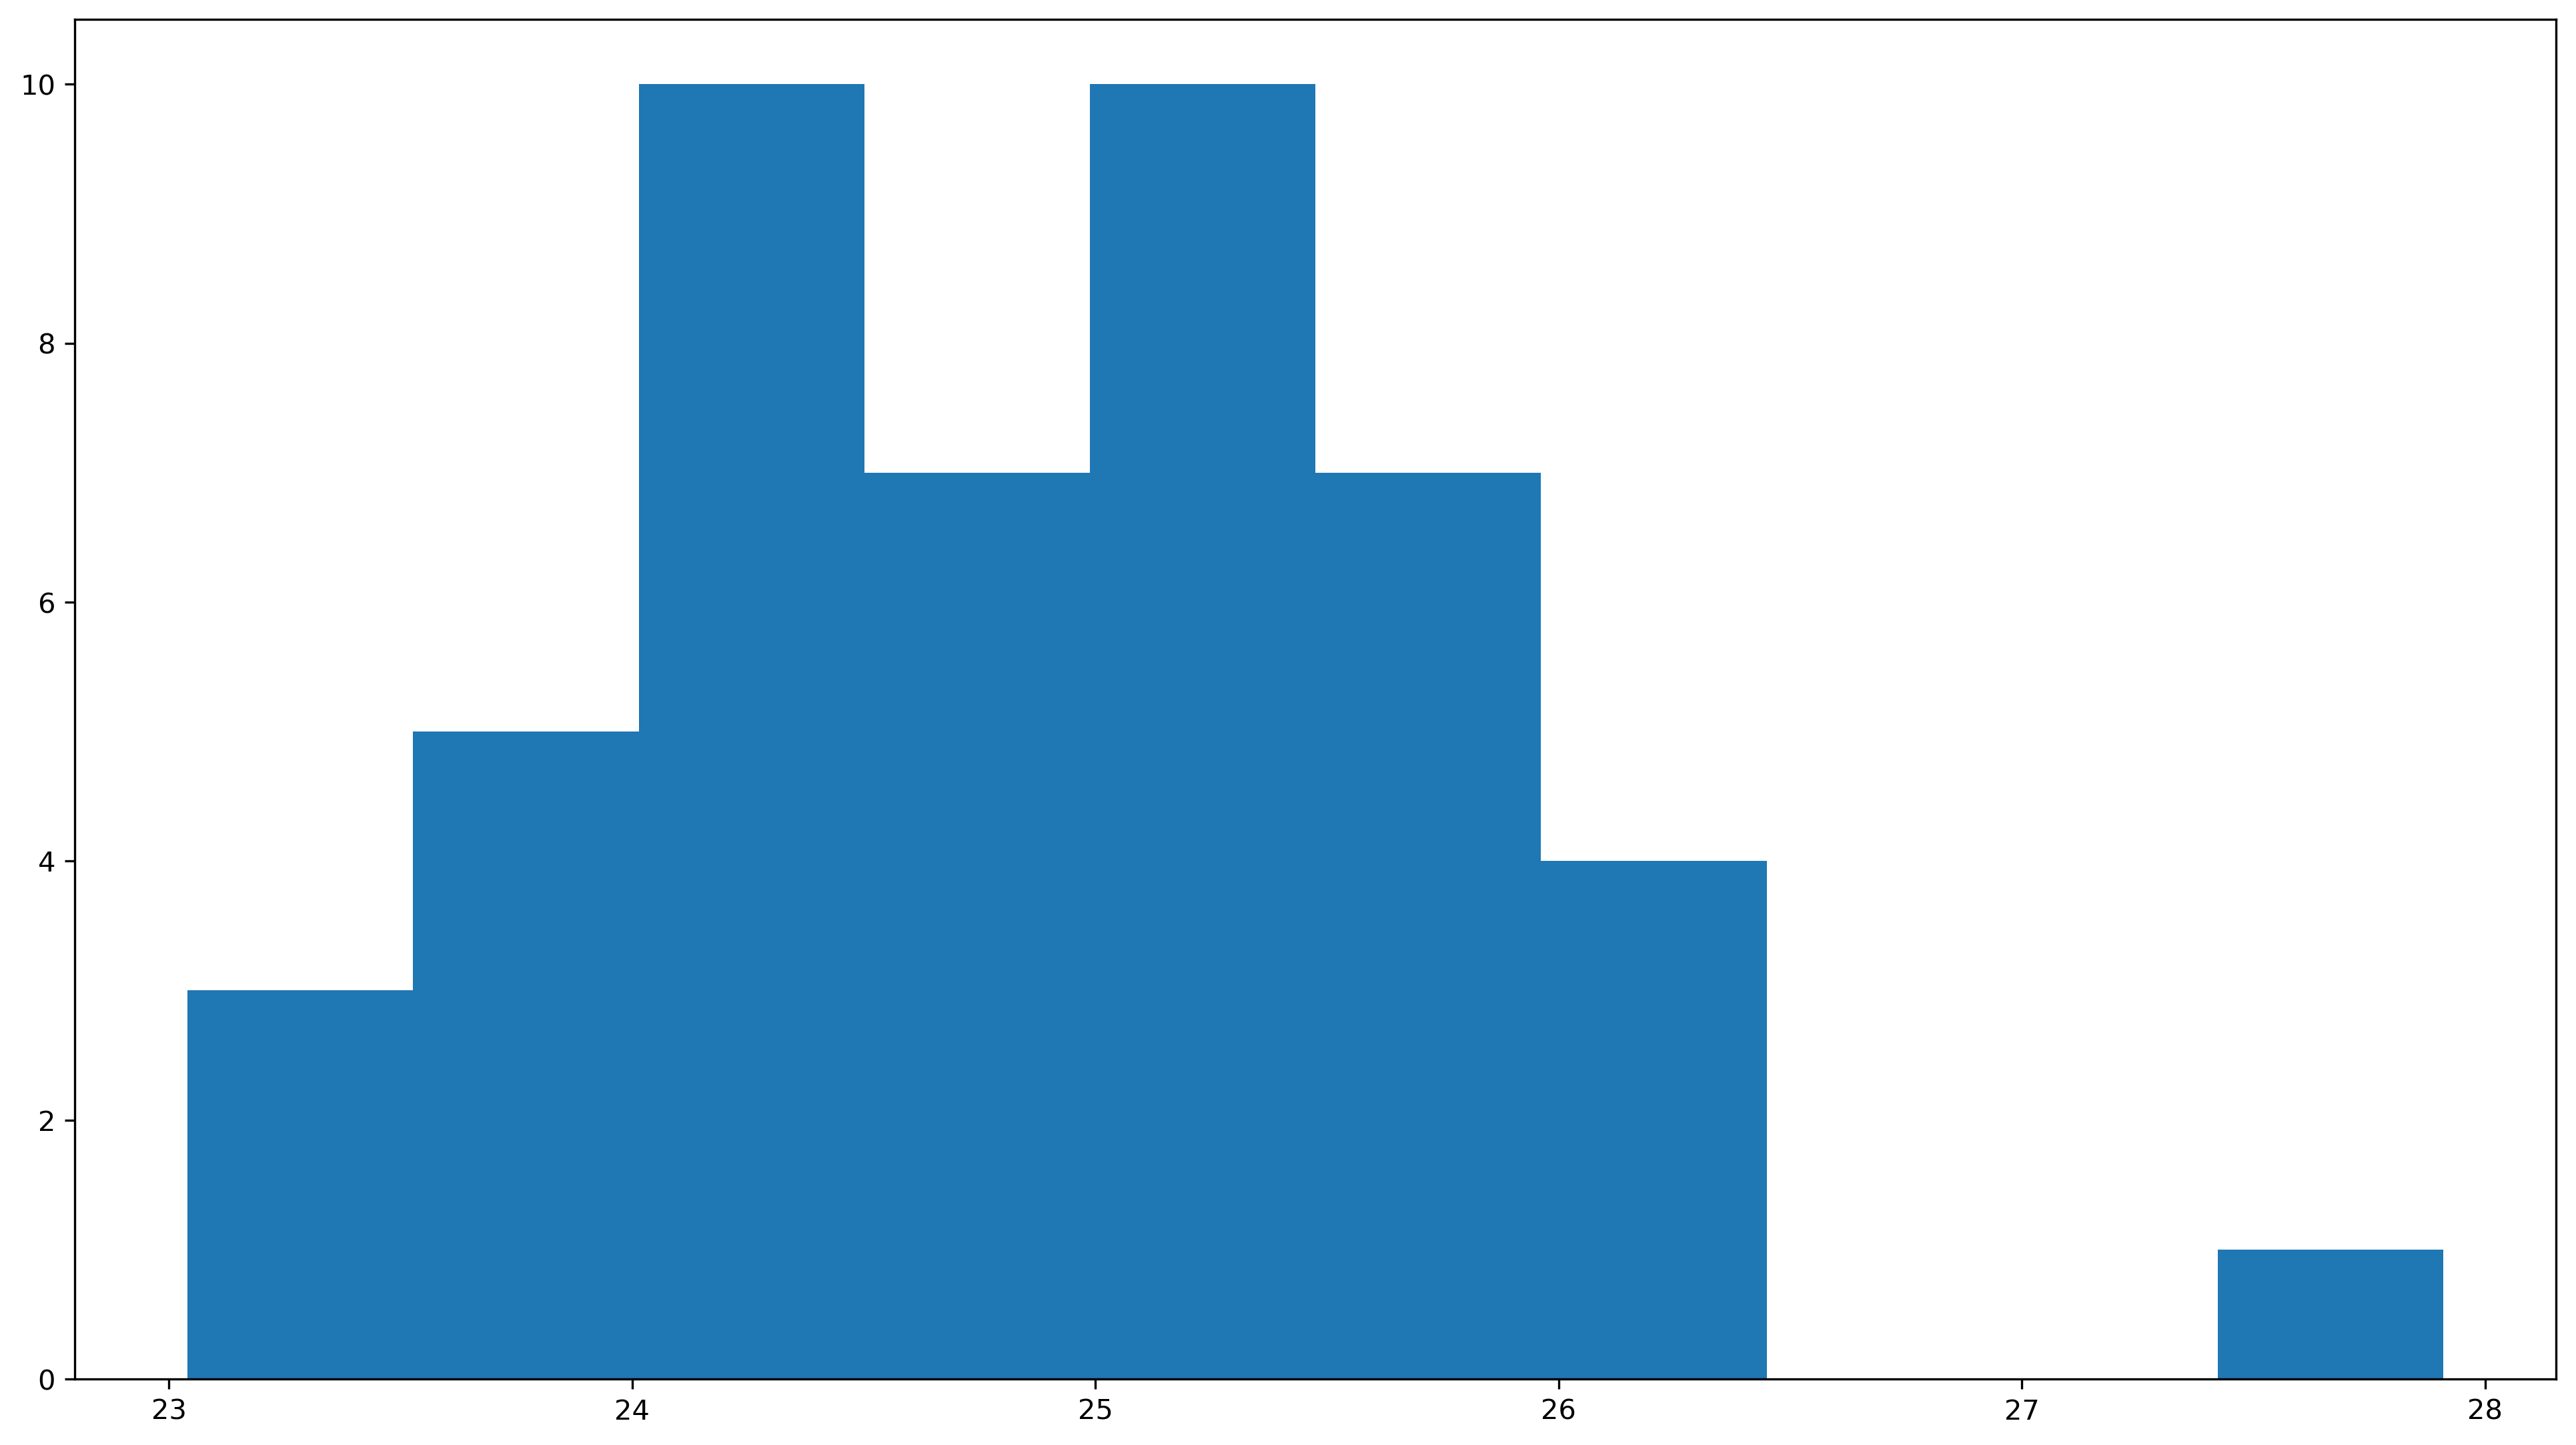

In [4]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 

# можно было бы и plt.hist(), пока неважно
ax.hist(df["NOV"]); 

По графику видно, что у распределения есть два пика, вокруг которых сосредоточены наблюдения, плюс, есть не совсем типичное значение температуры воздуха около 28 градусов. Давайте изменим цвет заливки графика, цвет границ столбцов, а также зафиксируем границы допустимых значений по оси X, чтобы убрать из рассмотрения нетипичное значение:

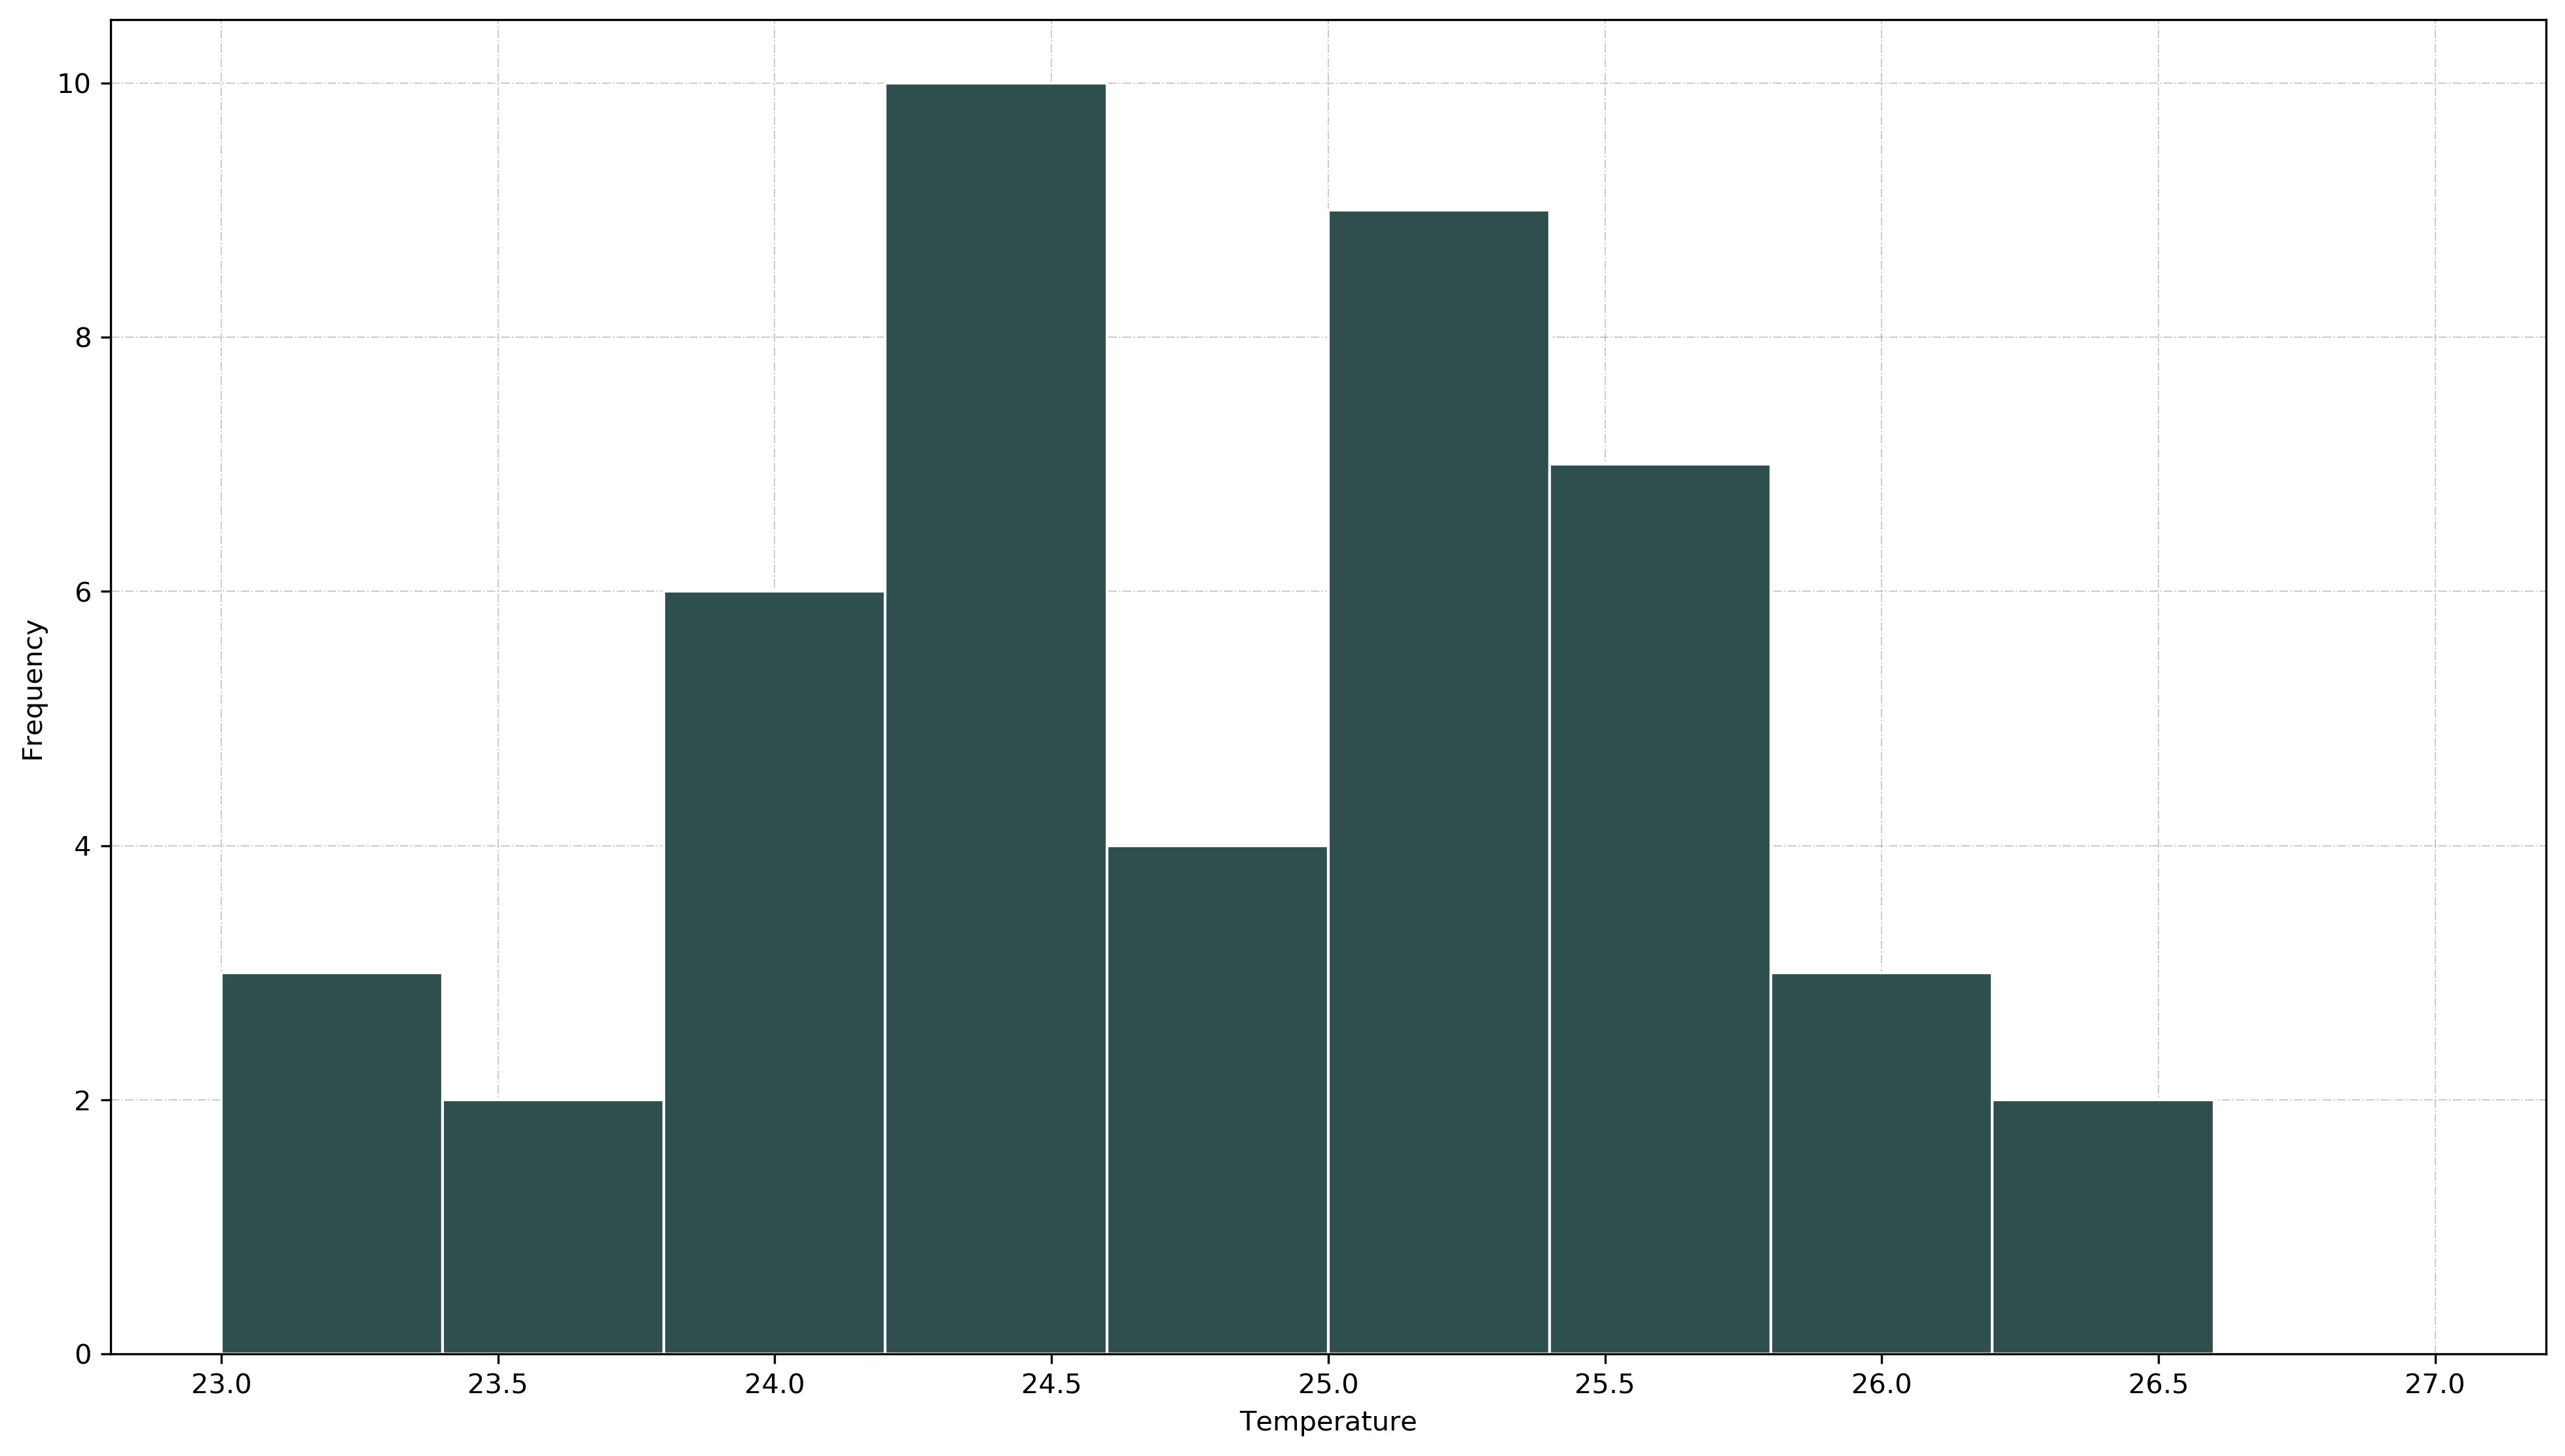

In [5]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 

# range - границы значений при построении гистограммы
plt.hist(df["NOV"], color = "darkslategrey", edgecolor = "white", range = (23, 27));

# подписи по осям (обсуждали ранее)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

# сетка (обсуждали ранее)
ax.set_axisbelow(True)
ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)

Если мы хотим получить не 10 столбцов (было автоматически подобрано по алгоритму [Стёрджесса]()), а какое-то свое число столбцов у гистограммы, можем указать его в аргументе `bins`:

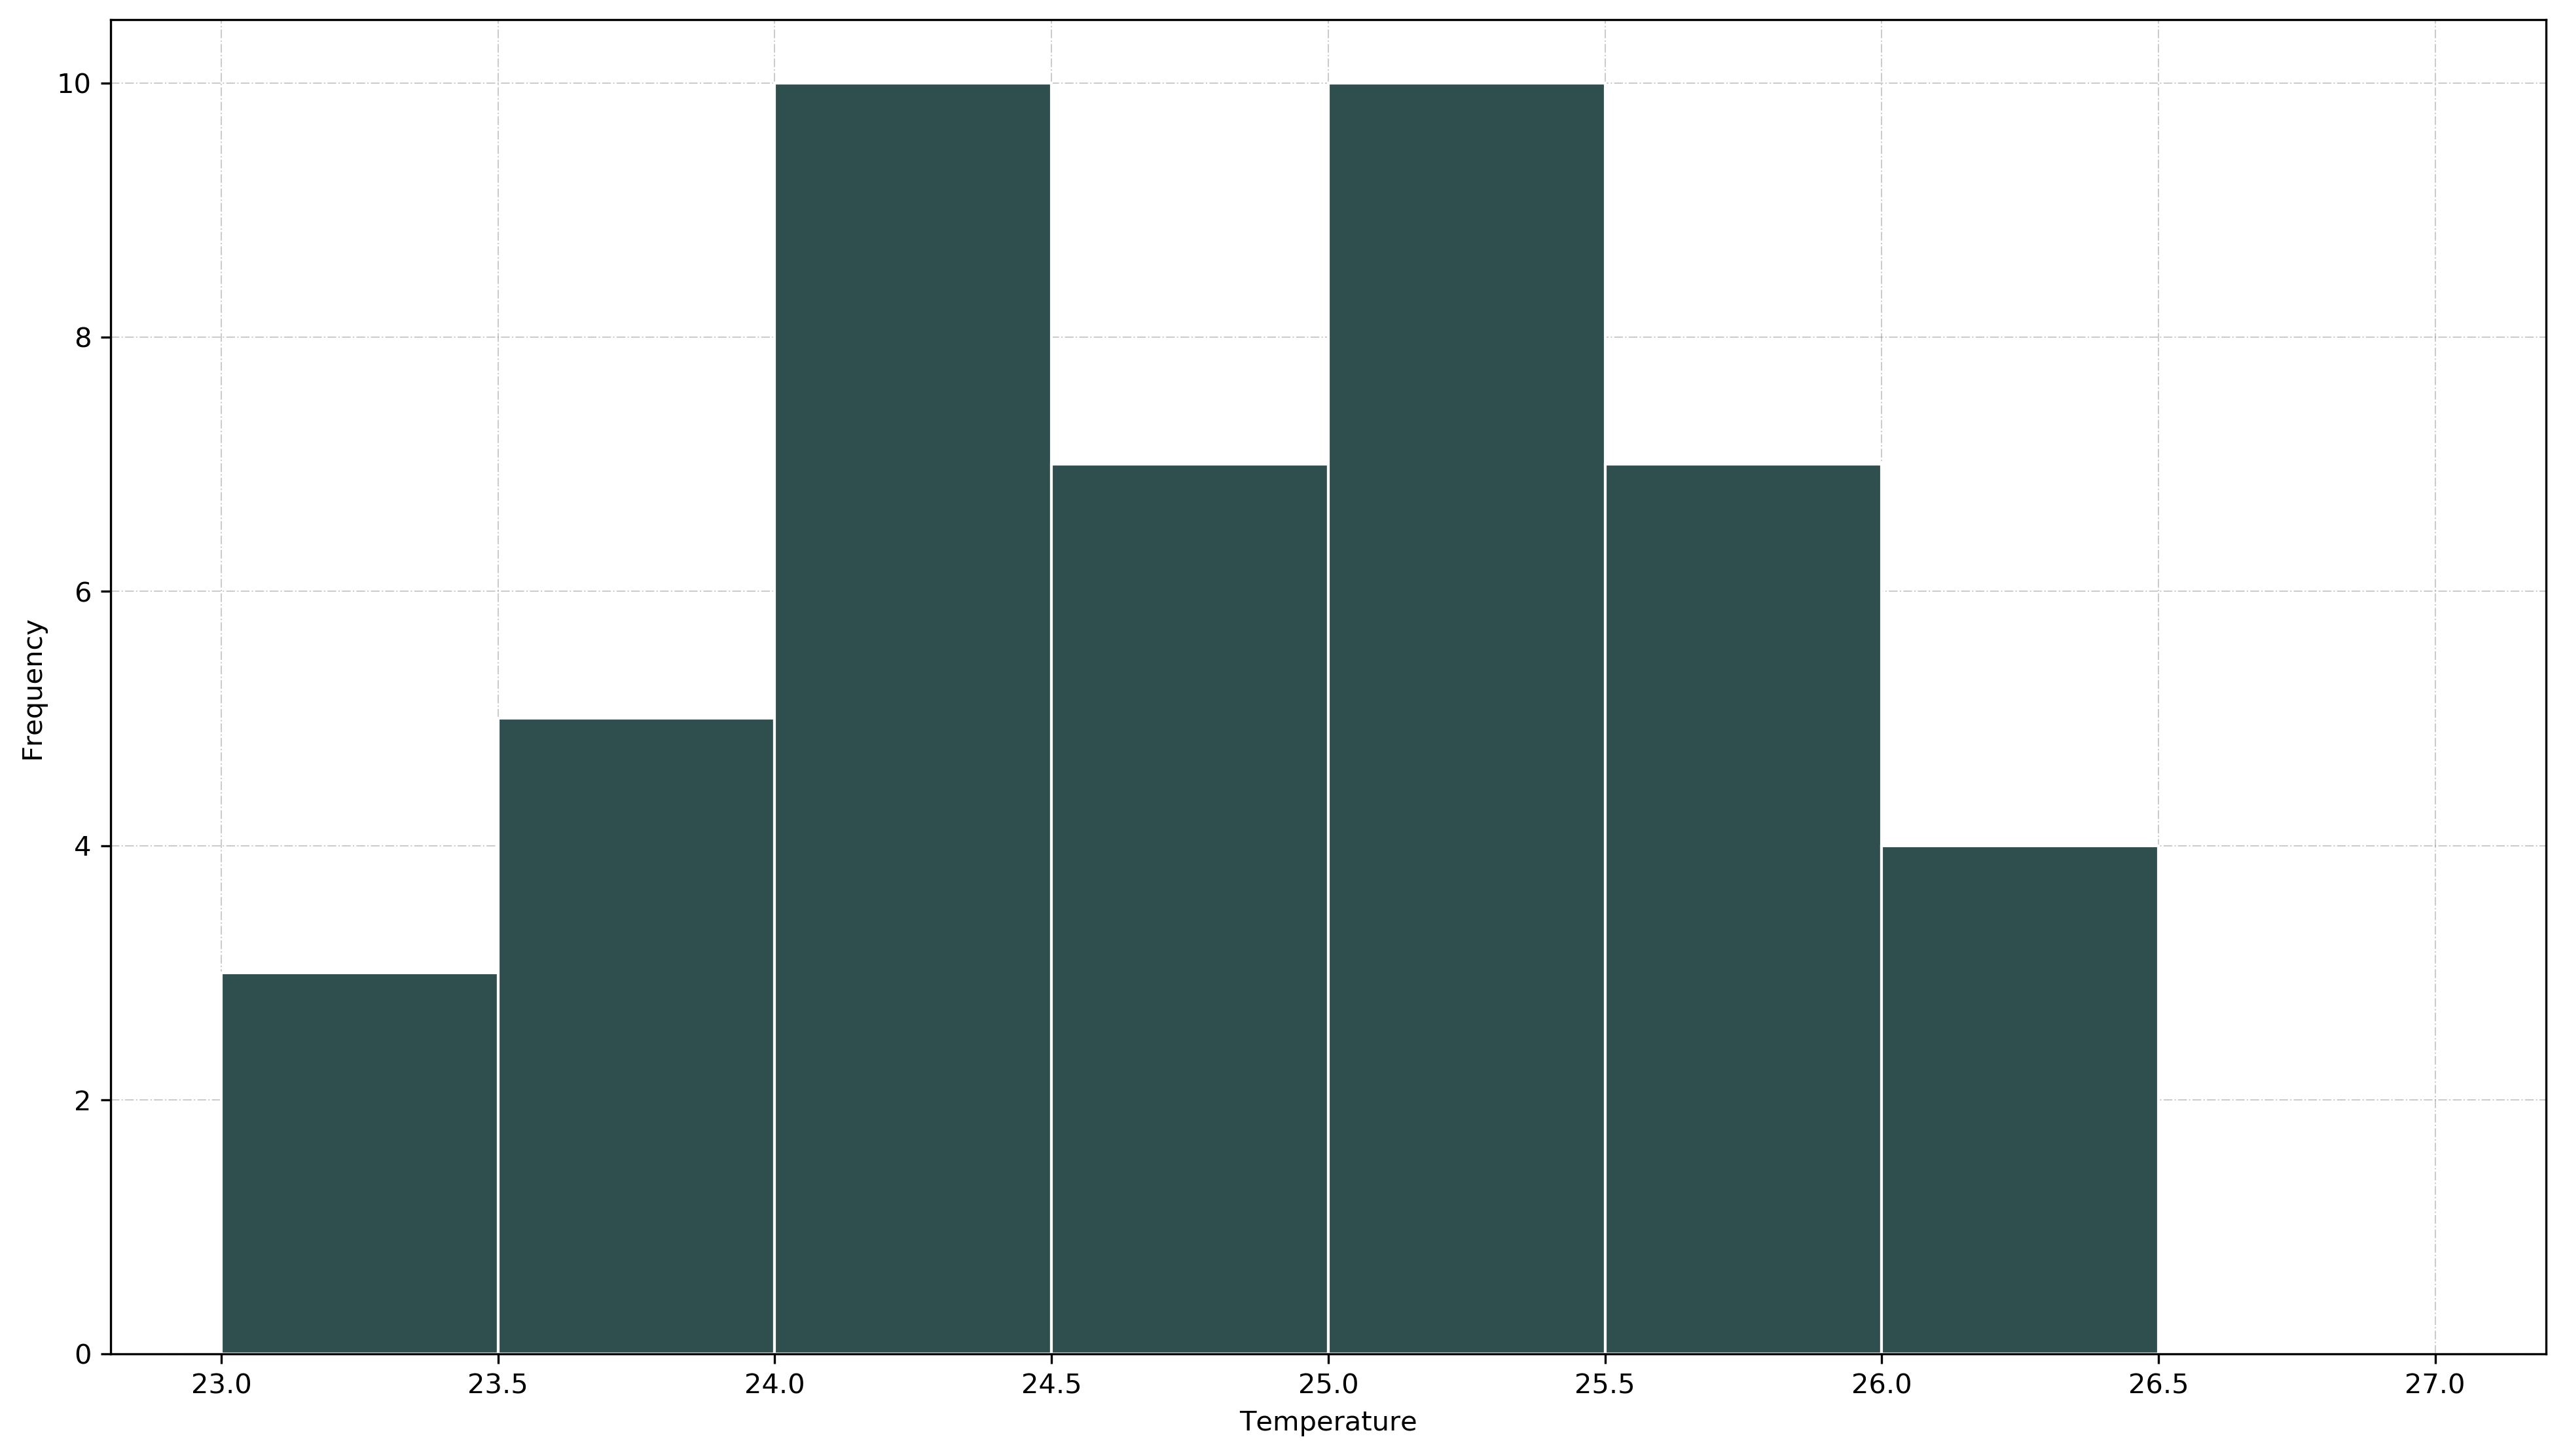

In [6]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 

# 8 столбцов
plt.hist(df["NOV"], color = "darkslategrey", edgecolor = "white", 
         range = (23, 27), bins = 8);

ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

ax.set_axisbelow(True)
ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)

А если мы хотим зафиксировать не число столбцов, а ширину каждого столбца? Тогда в `bins` надо записать массив или список с границами для деления данных на группы («засечки» для отметки столбцов). Выберем ширину столбца равную стандартному отклонению температуры воздуха в ноябре, округленную до второго знака после запятой:

In [7]:
s = np.round(np.std(df["NOV"]), 2) 
s

0.95

Сформируем массив от минимального значения температуры до максимального с шагом 0.95:

In [8]:
# будут столбцы с границами [23, 23.95), [23.95, 24.9), [24.9, 25.85), [25.85, 26.8]

w = np.arange(23, 27, s) 
w  

array([23.  , 23.95, 24.9 , 25.85, 26.8 ])

Это позволит получить столбцы с границами [23, 23.95), [23.95, 24.9), [24.9, 25.85), [25.85, 26.8]. Обратите внимание: в функции `hist()` по умолчанию правый конец отрезков, используемых для группировки, исключается (кроме последнего, чтобы не потерять данные).

Поместим полученный массив в `bins`, чтобы дать указание `hist()` построить столбцы, которые мы хотим:

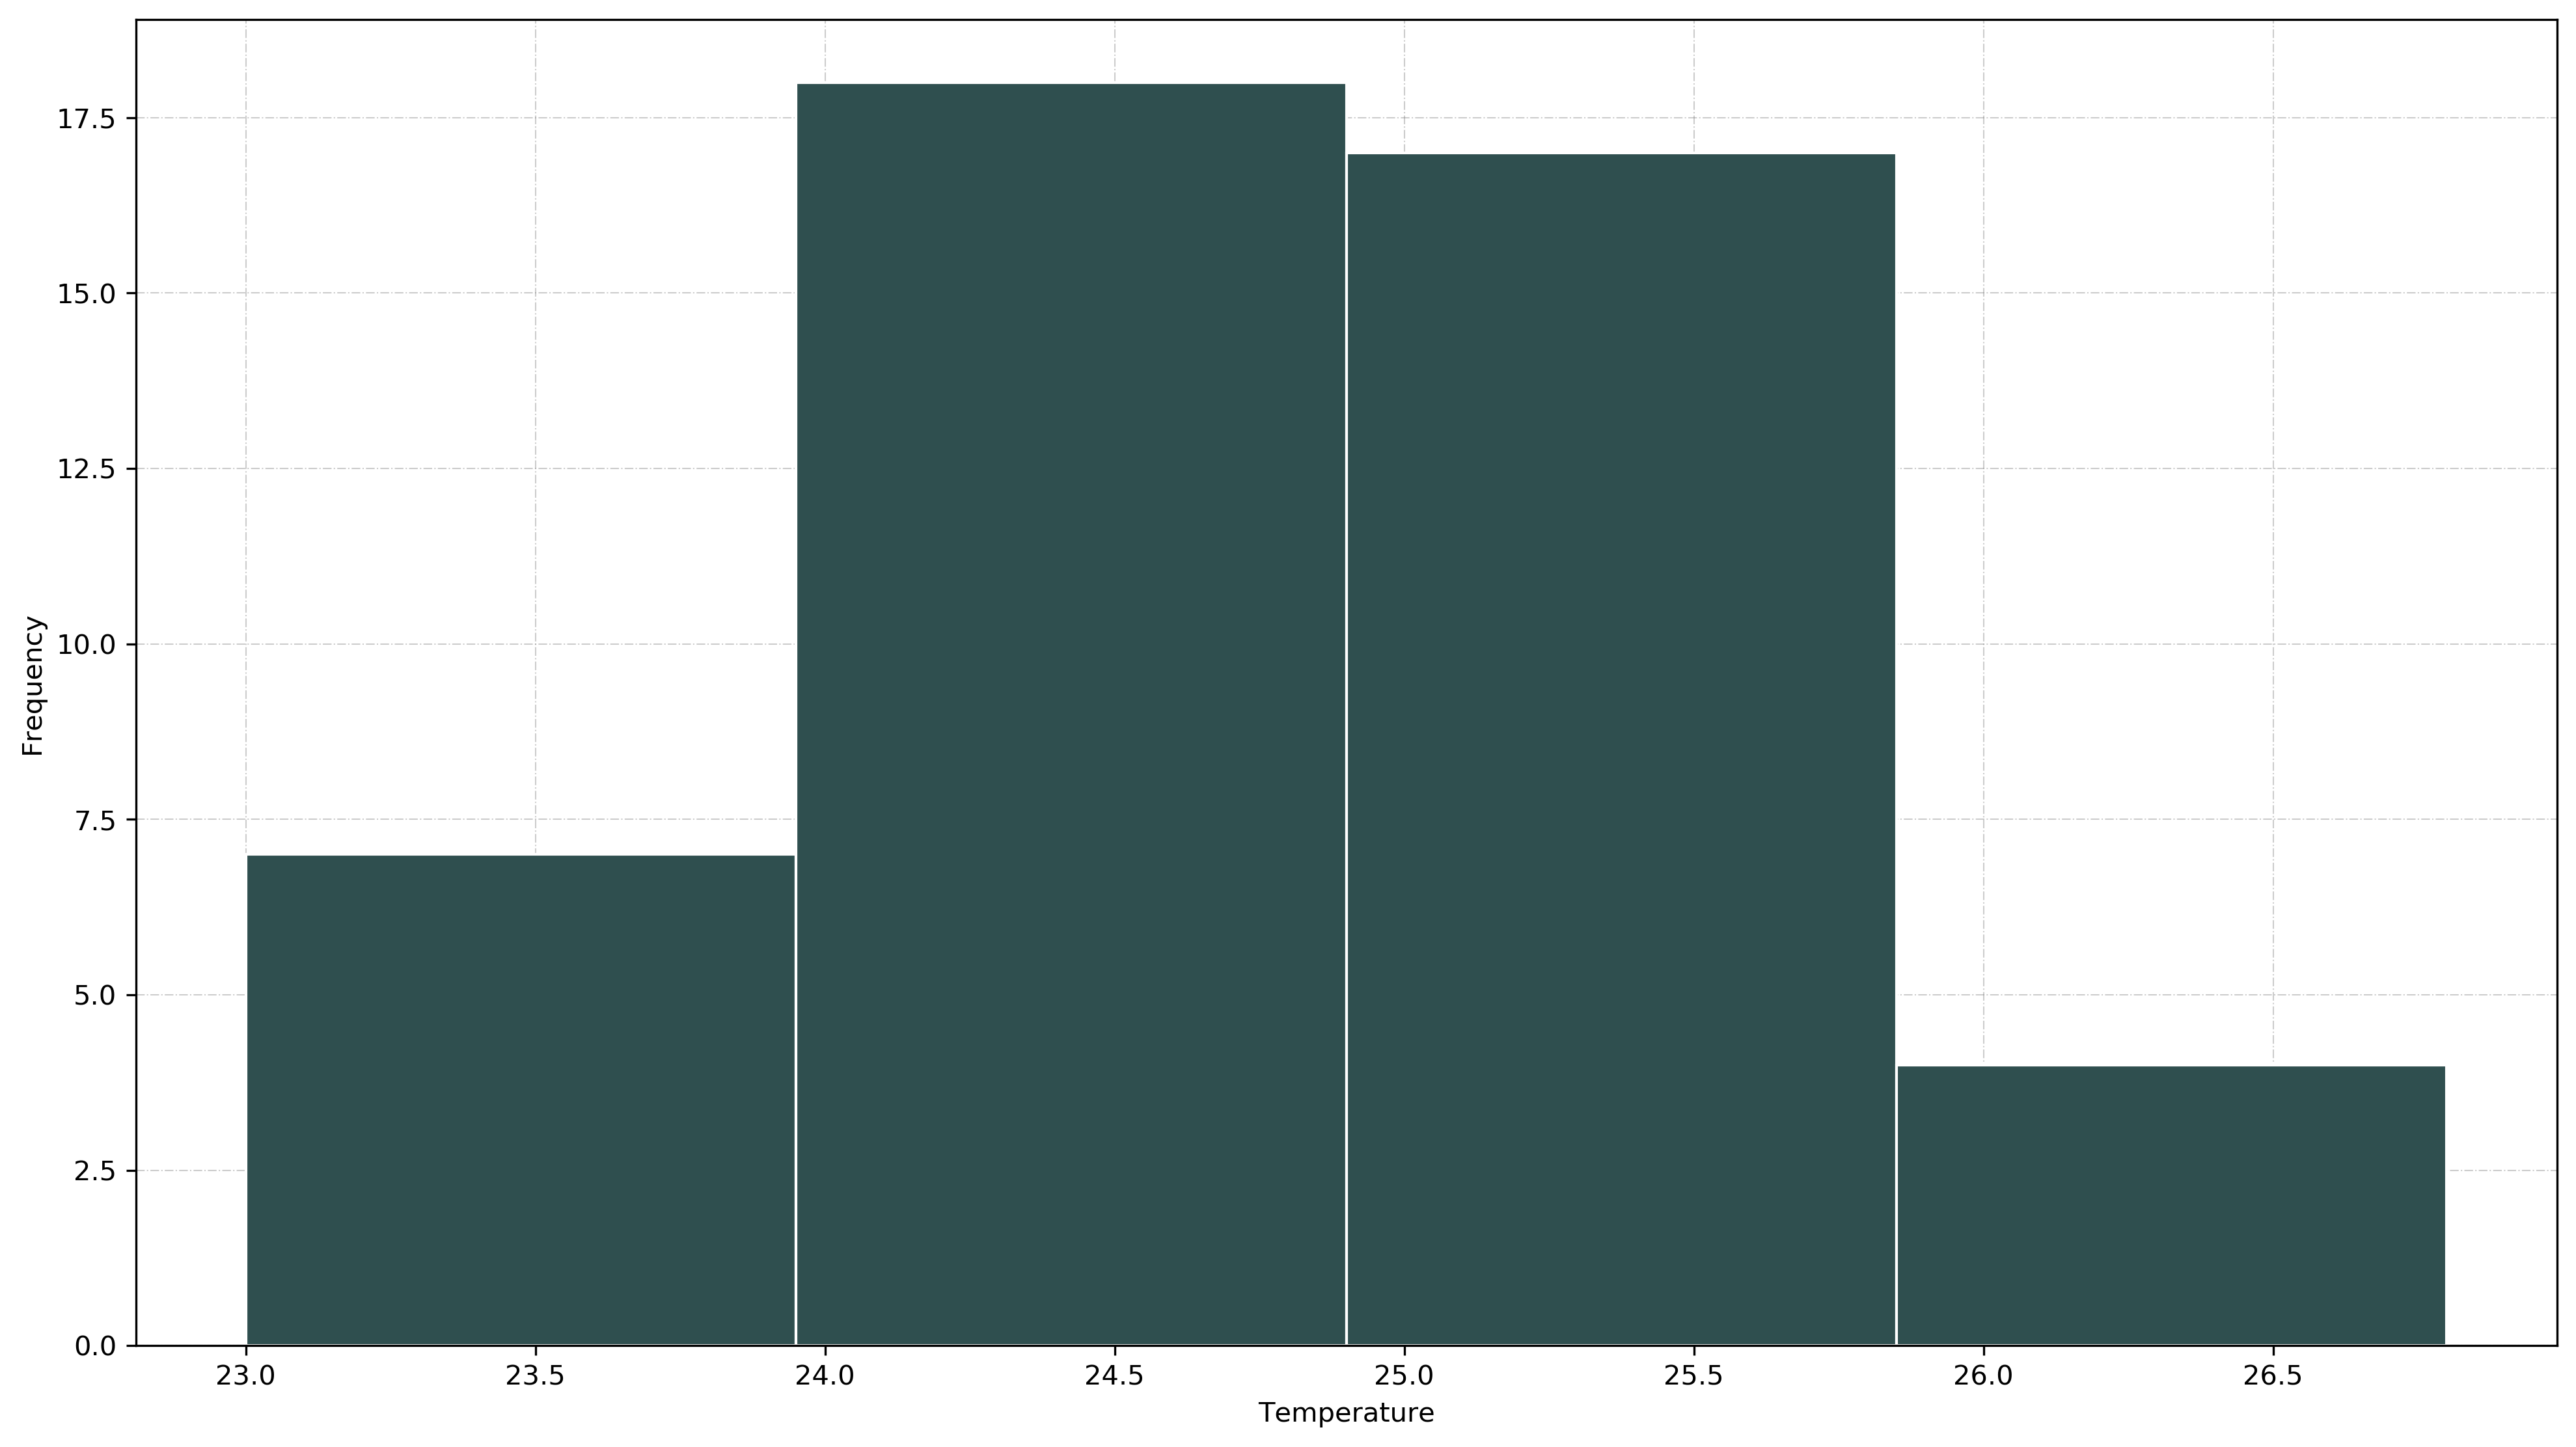

In [9]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
plt.hist(df["NOV"], color = "darkslategrey", edgecolor = "white", 
         range = (23, 27), bins = w);

ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

ax.set_axisbelow(True)
ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)

Теперь добавим на график вертикальные линии, отчерчивающие среднее и медиану. Сначала вычислим среднее и медиану:

In [10]:
np.mean(df["NOV"])

24.857021276595745

In [11]:
np.median(df["NOV"])

24.78

Для добавления вертикальной линии для среднего воспользуемся методом `.vlines()`. На вход этому методу необходимо подать значение по оси `x`, через которое будет проходить линия, а также границы для этой линии по оси `y`:

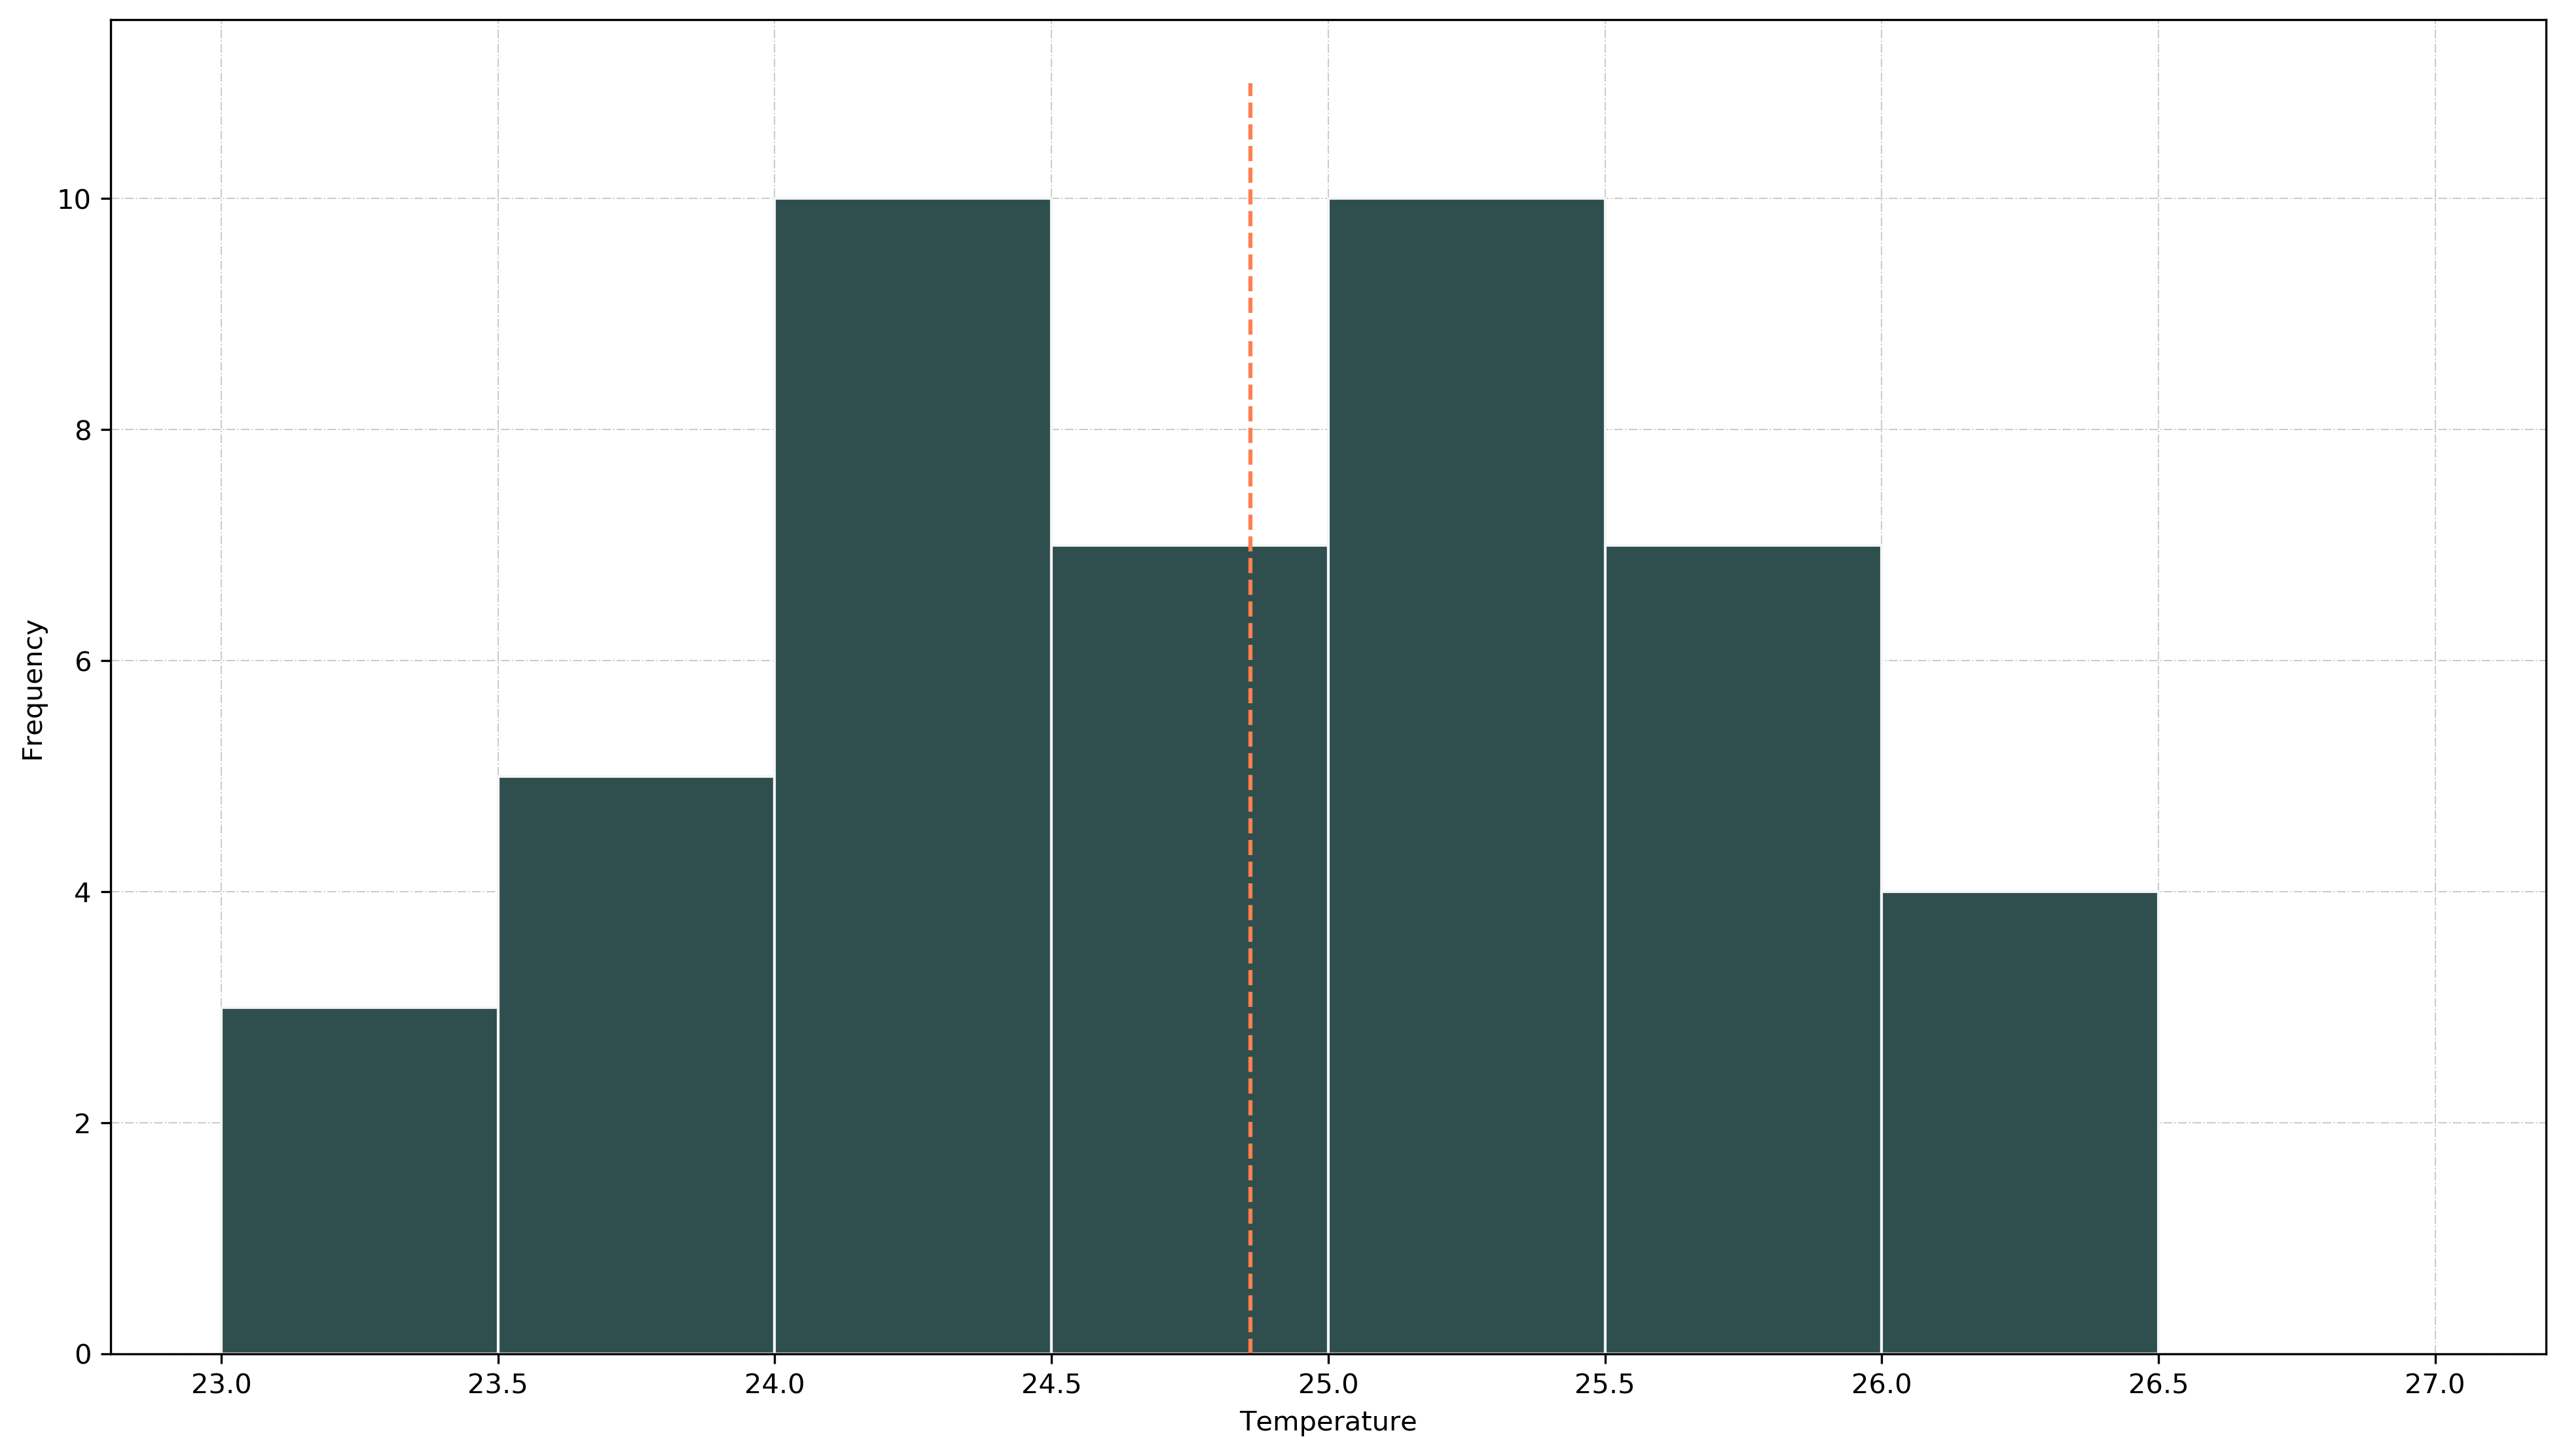

In [12]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
ax.hist(df["NOV"], color = "darkslategrey", edgecolor = "whitesmoke", 
         range = (23, 27), bins = 8);

# накладываем на предыдущий график в ax

ax.vlines(x = 24.86, ymin = 0, ymax = 11, color = "coral", linestyle = "dashed")

ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

ax.set_axisbelow(True)
ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)

Линия добавилась, но осталась небольшая проблема – зазор между линией и рамкой графика сверху. Изменение аргумента `ymax` в данном случает не поможет, поэтому просто зафиксируем границы по оси Y для самого графика через `.set_ylim()`:

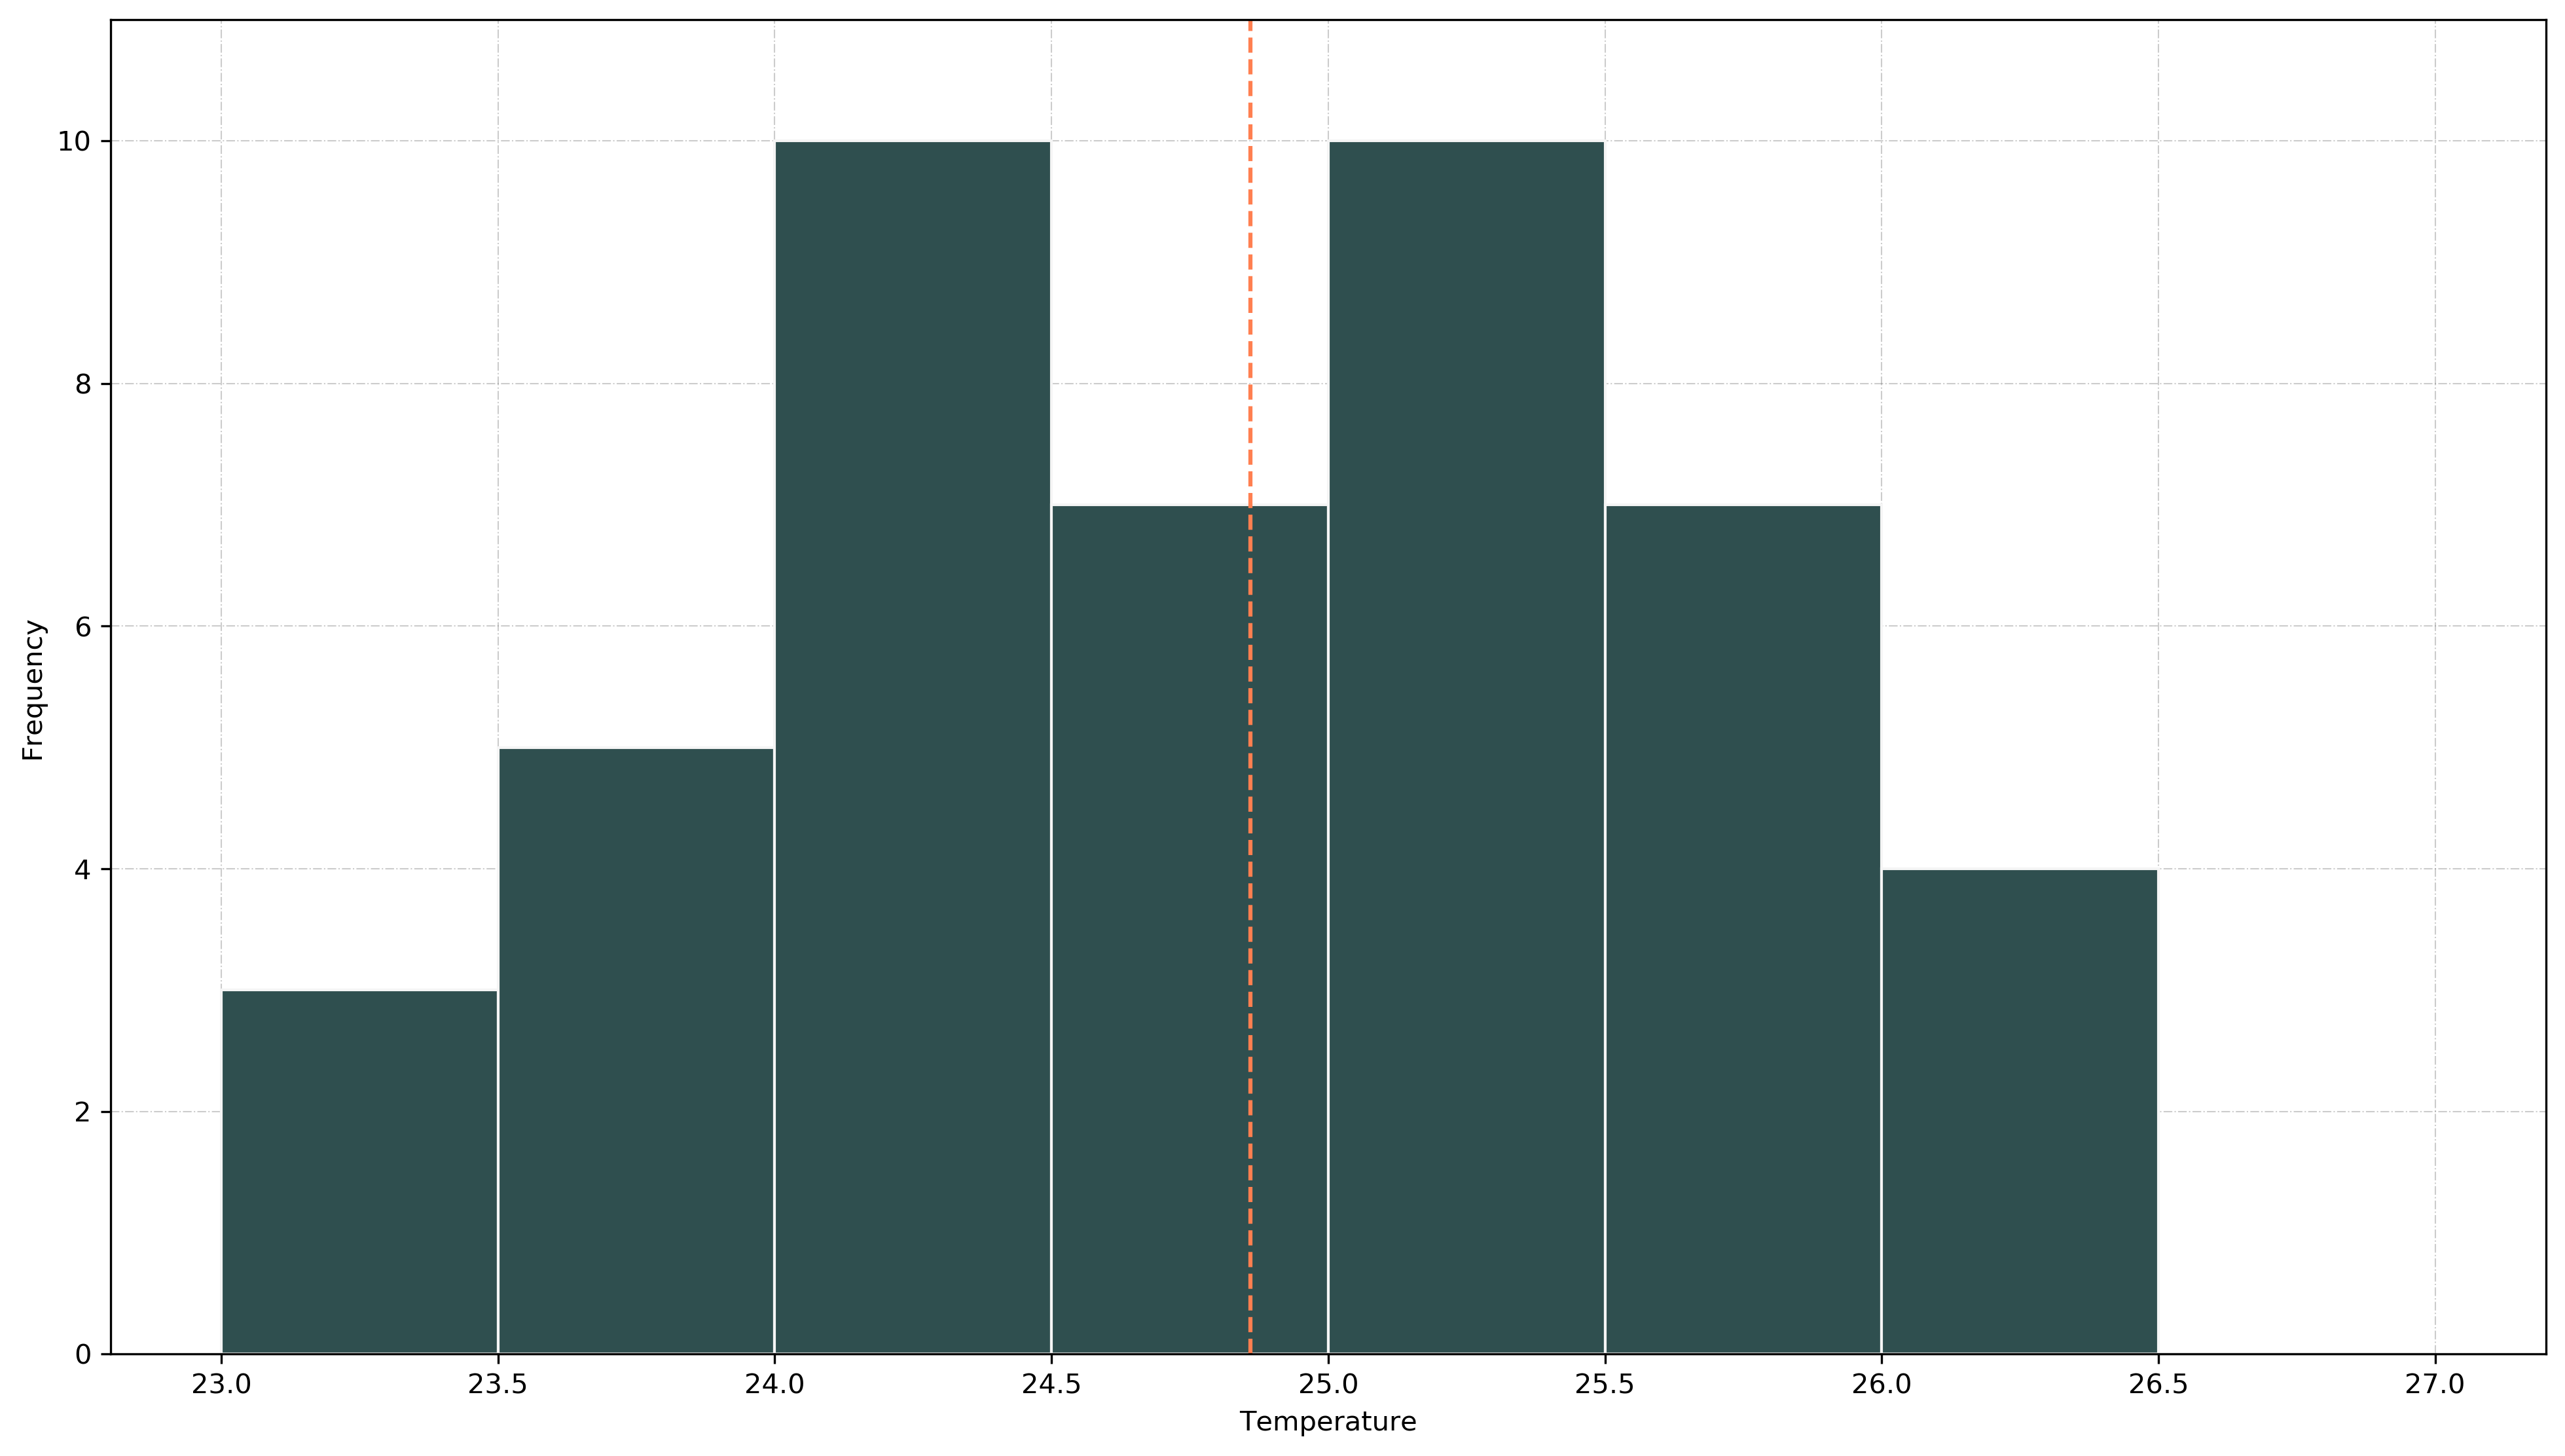

In [13]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
ax.hist(df["NOV"], color = "darkslategrey", edgecolor = "whitesmoke", 
         range = (23, 27), bins = 8);

ax.vlines(x = 24.86, ymin = 0, ymax = 11, color = "coral", linestyle = "dashed")

ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

# тоже от 0 до 11, как в ymin и ymax в vlines()
ax.set_ylim(bottom = 0, top = 11)

ax.set_axisbelow(True)
ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)

Осталось аналогичным образом добавить линию для медианы. Только давайте выполним еще одно действие – добавим метки для каждой вертикальной линии (аргумент `label`) и отразим подписи в легенде графика:

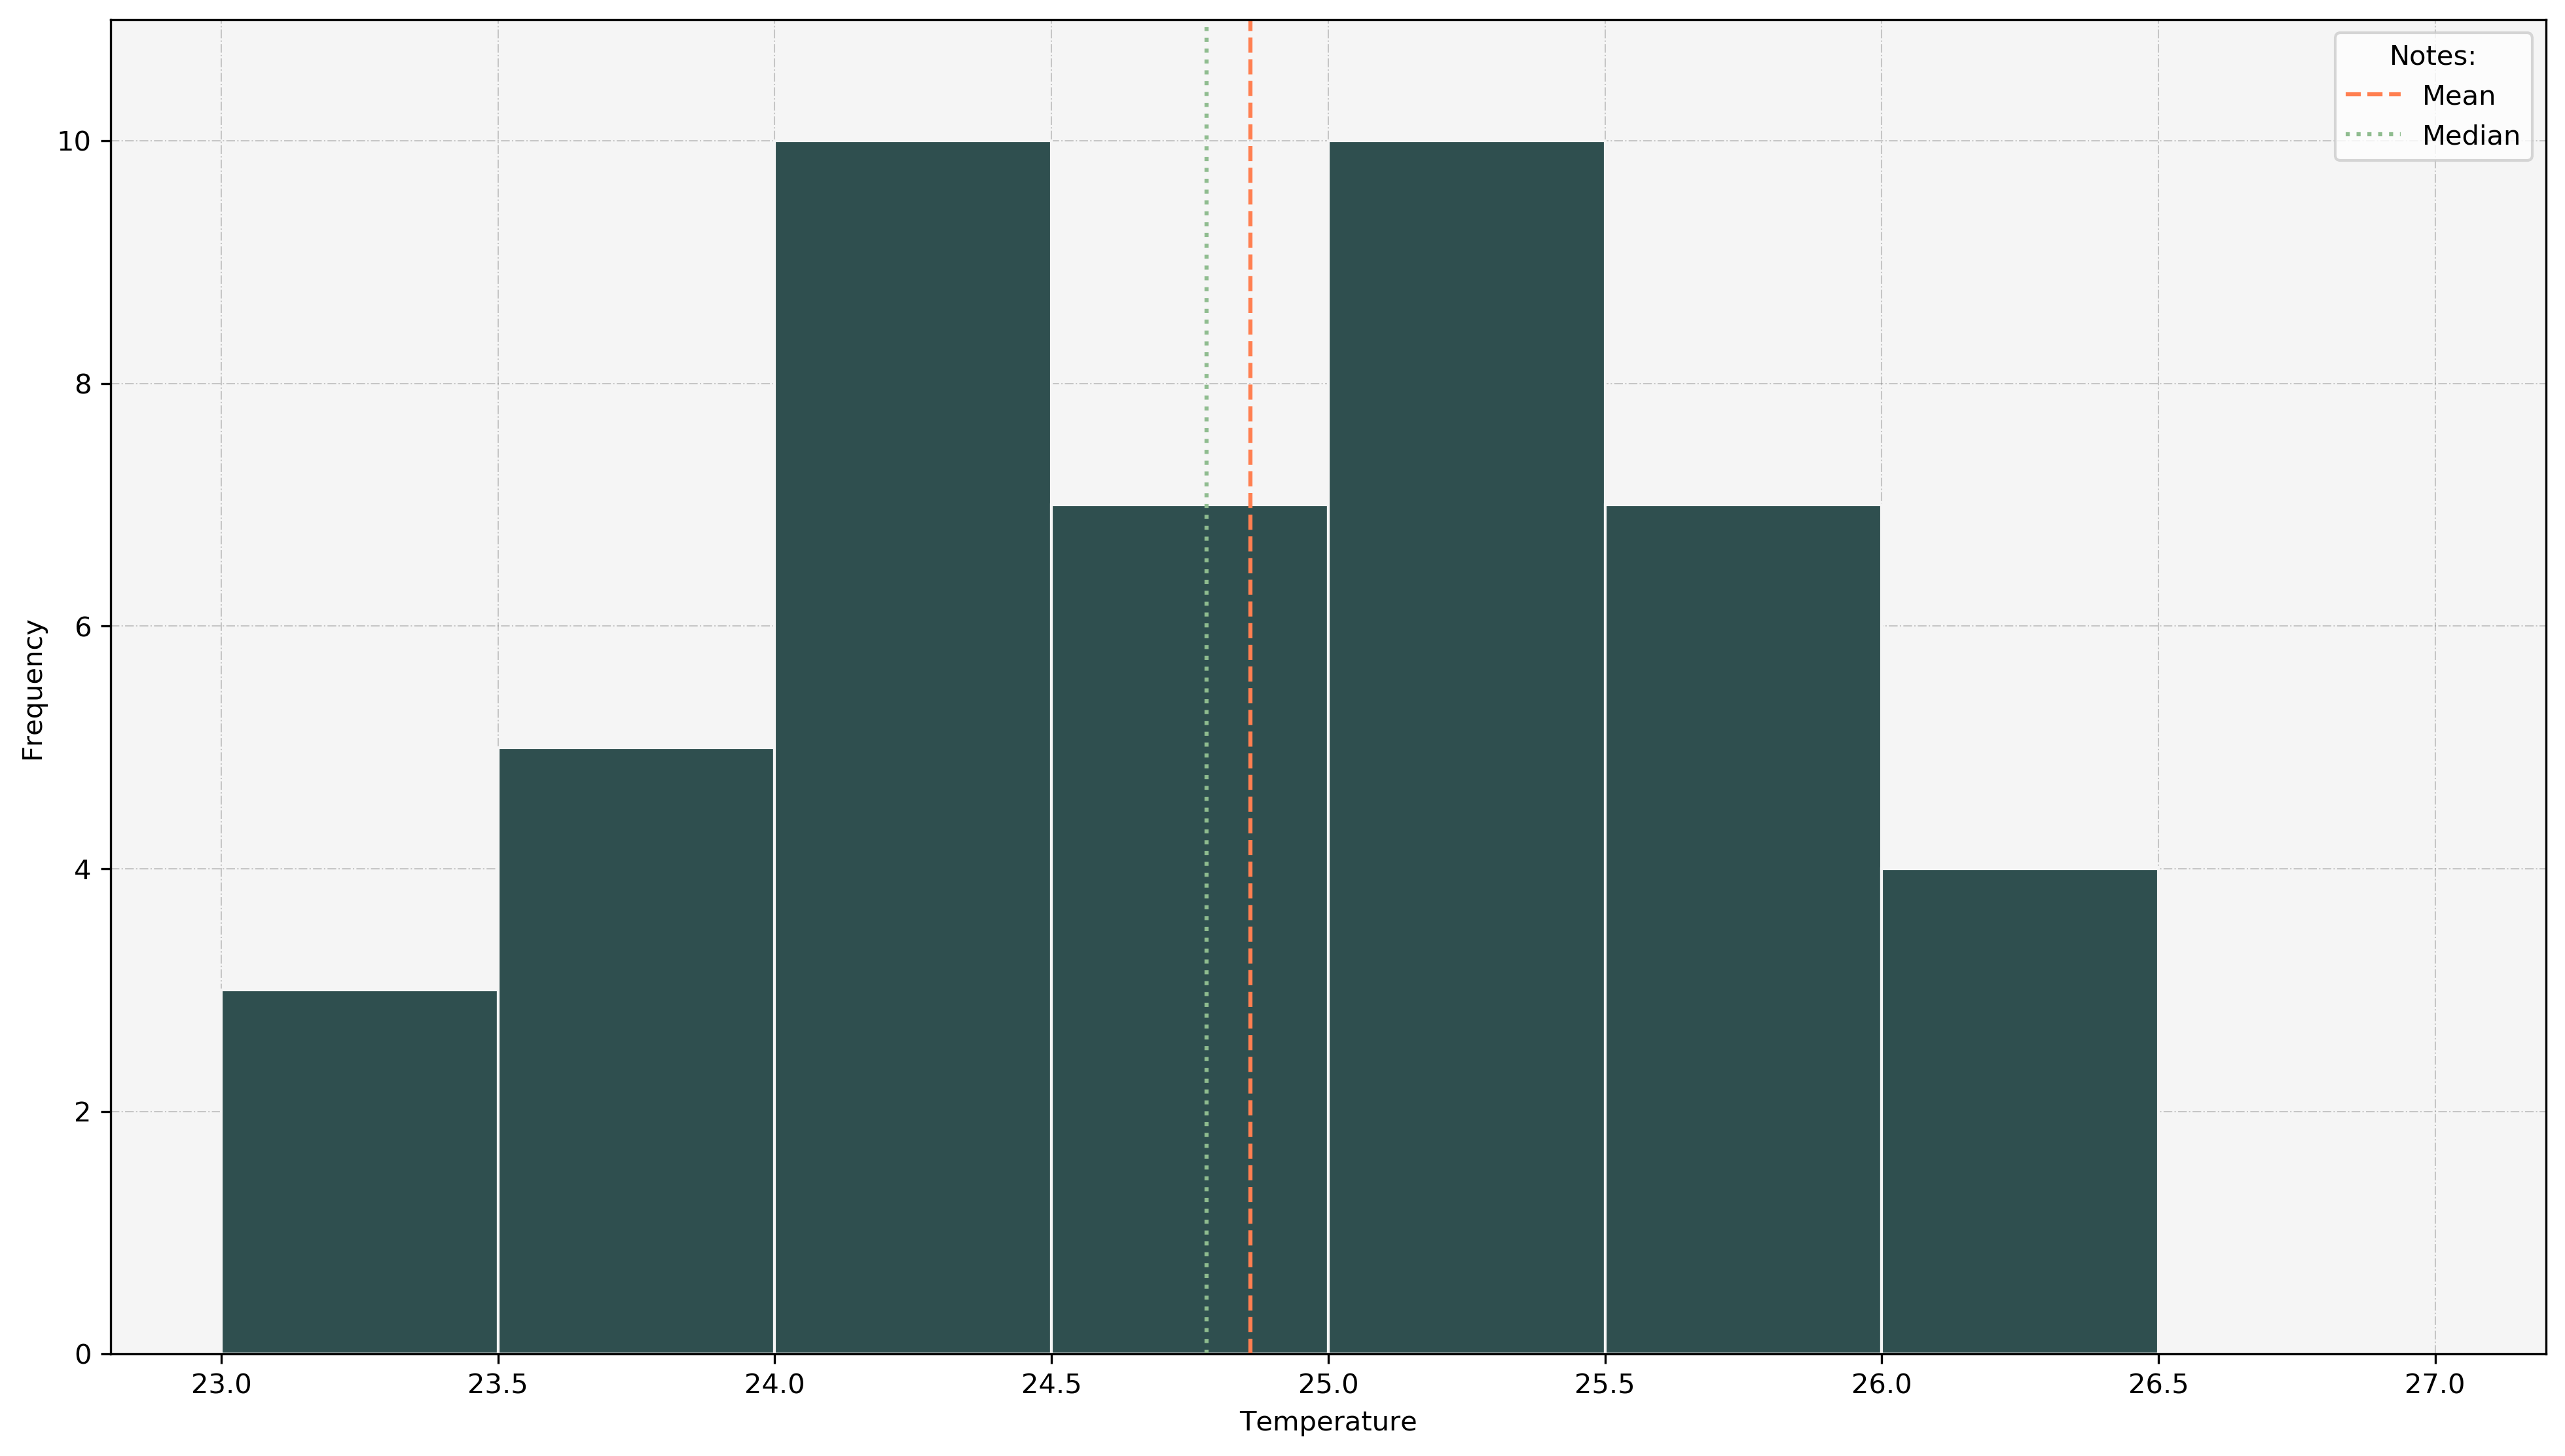

In [14]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
ax.hist(df["NOV"], color = "darkslategrey", edgecolor = "whitesmoke", 
         range = (23, 27), bins = 8);

# накладываем на предыдущий график в ax уже две линии друг за другом
# не забываем про label с содержательным названием

ax.vlines(x = 24.86, ymin = 0, ymax = 11, color = "coral", linestyle = "dashed", label = "Mean")
ax.vlines(x = 24.78, ymin = 0, ymax = 11, color = "darkseagreen", linestyle = "dotted", label = "Median")

ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.set_ylim(bottom = 0, top = 11)

# заодно добавим цвет для фона графика
ax.set_facecolor("whitesmoke")

# добавляем легенду, в ней отразятся линии и подписи из vlines(), 
# так как добавили labels
ax.legend(loc = "upper right", title = "Notes:")

ax.set_axisbelow(True)
ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)

Если бы подписи были не нужны, можно было бы создать обе линии внутри одного `.vlines()`, этот метод умеет работать со списком значений и, следовательно, со списком цветов и типов линий, если каждое значение должно быть отмечено своим цветом и маркером:

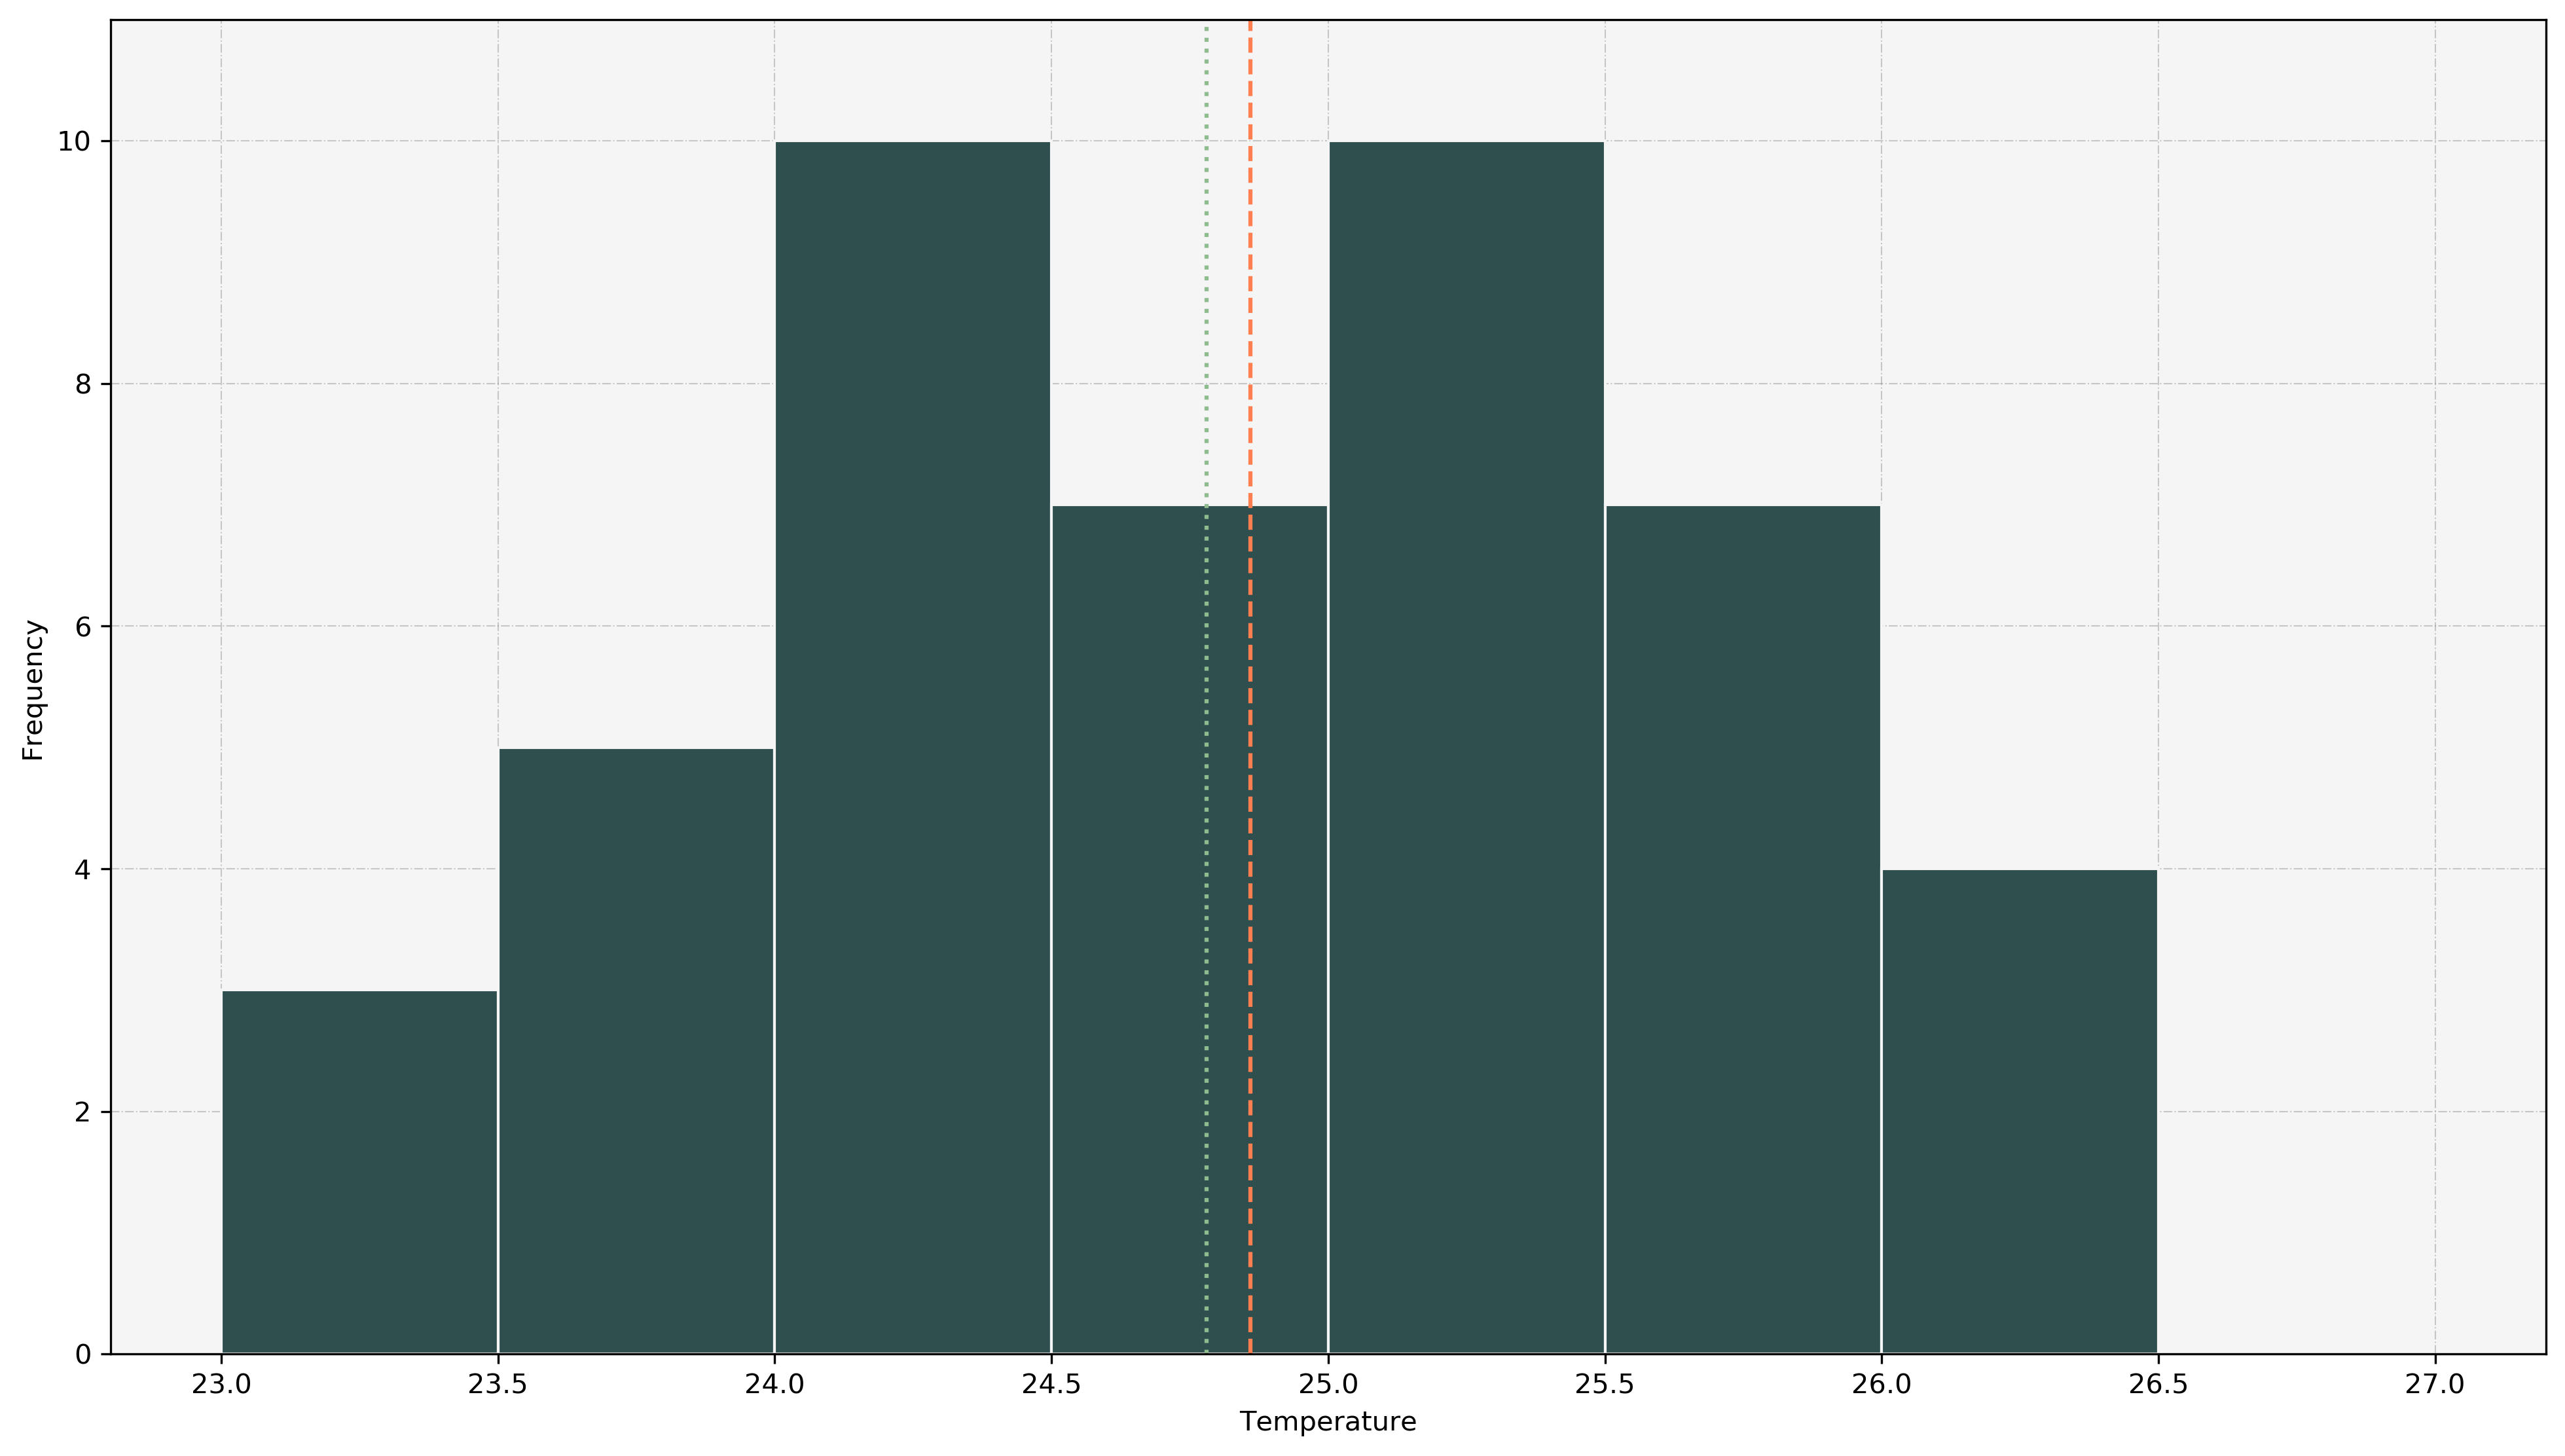

In [15]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
ax.hist(df["NOV"], color = "darkslategrey", edgecolor = "whitesmoke", 
         range = (23, 27), bins = 8);

ax.vlines(x = [24.86, 24.78], ymin = 0, ymax = 11, color = ["coral", "darkseagreen"], 
          linestyle = ["dashed", "dotted"])

ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.set_ylim(bottom = 0, top = 11)
ax.set_facecolor("whitesmoke")

ax.set_axisbelow(True)
ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)

### Построение графиков по группам

Теперь давайте рассмотрим более интересную задачу – построим гистограммы для температуры воздуха по каждому месяцу. Для начала отберем столбцы, соответствующие разным месяцам, и сохраним их в отдельный датафрейм `temp`:

In [16]:
# loc – выбор по названиям строк/столбцов
# все строки, столбцы с JAN по DEC включительно

temp = df.loc[:, "JAN" : "DEC"]

Сразу переименуем столбцы, чтобы у нас были полные названия месяцев:

In [17]:
months = ["January", "February", "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"] 

In [18]:
temp.columns = months

Список `months` можно использовать для того, чтобы вызывать отдельные столбцы из `temp` в цикле, это может пригодиться для построения графиков для каждого столбца:

In [20]:
for m in months:
    print(temp[m]) 

Далее нам понадобятся не только названия столбцов, но и их индексы, поэтому давайте впомним про функцию `enumerate()`:

In [21]:
list(enumerate(months))

[(0, 'January'),
 (1, 'February'),
 (2, 'March'),
 (3, 'April'),
 (4, 'May'),
 (5, 'June'),
 (6, 'July'),
 (7, 'August'),
 (8, 'September'),
 (9, 'October'),
 (10, 'November'),
 (11, 'December')]

Эта функция возвращает индексы элементов и сами элементы списка в виде списка пар, представляющих собой кортежи (на самом деле, не совсем в виде списка, это специальный тип `enumerate`, но в коде выше мы явно превратили результат в список). 

Для построения графиков для каждого месяца за один раз нам нужно создать шаблон для серии графиков и определиться с тем, как эти графики будут расположены. Так как месяцев 12, удобно будет создать «сетку» из графиков размерности 4 на 3 или 3 на 4. Создадим ее с помощью знакомой функции `subplots()`, добавив аргументы `nrows` и `ncols` для числа строк и столбцов: 

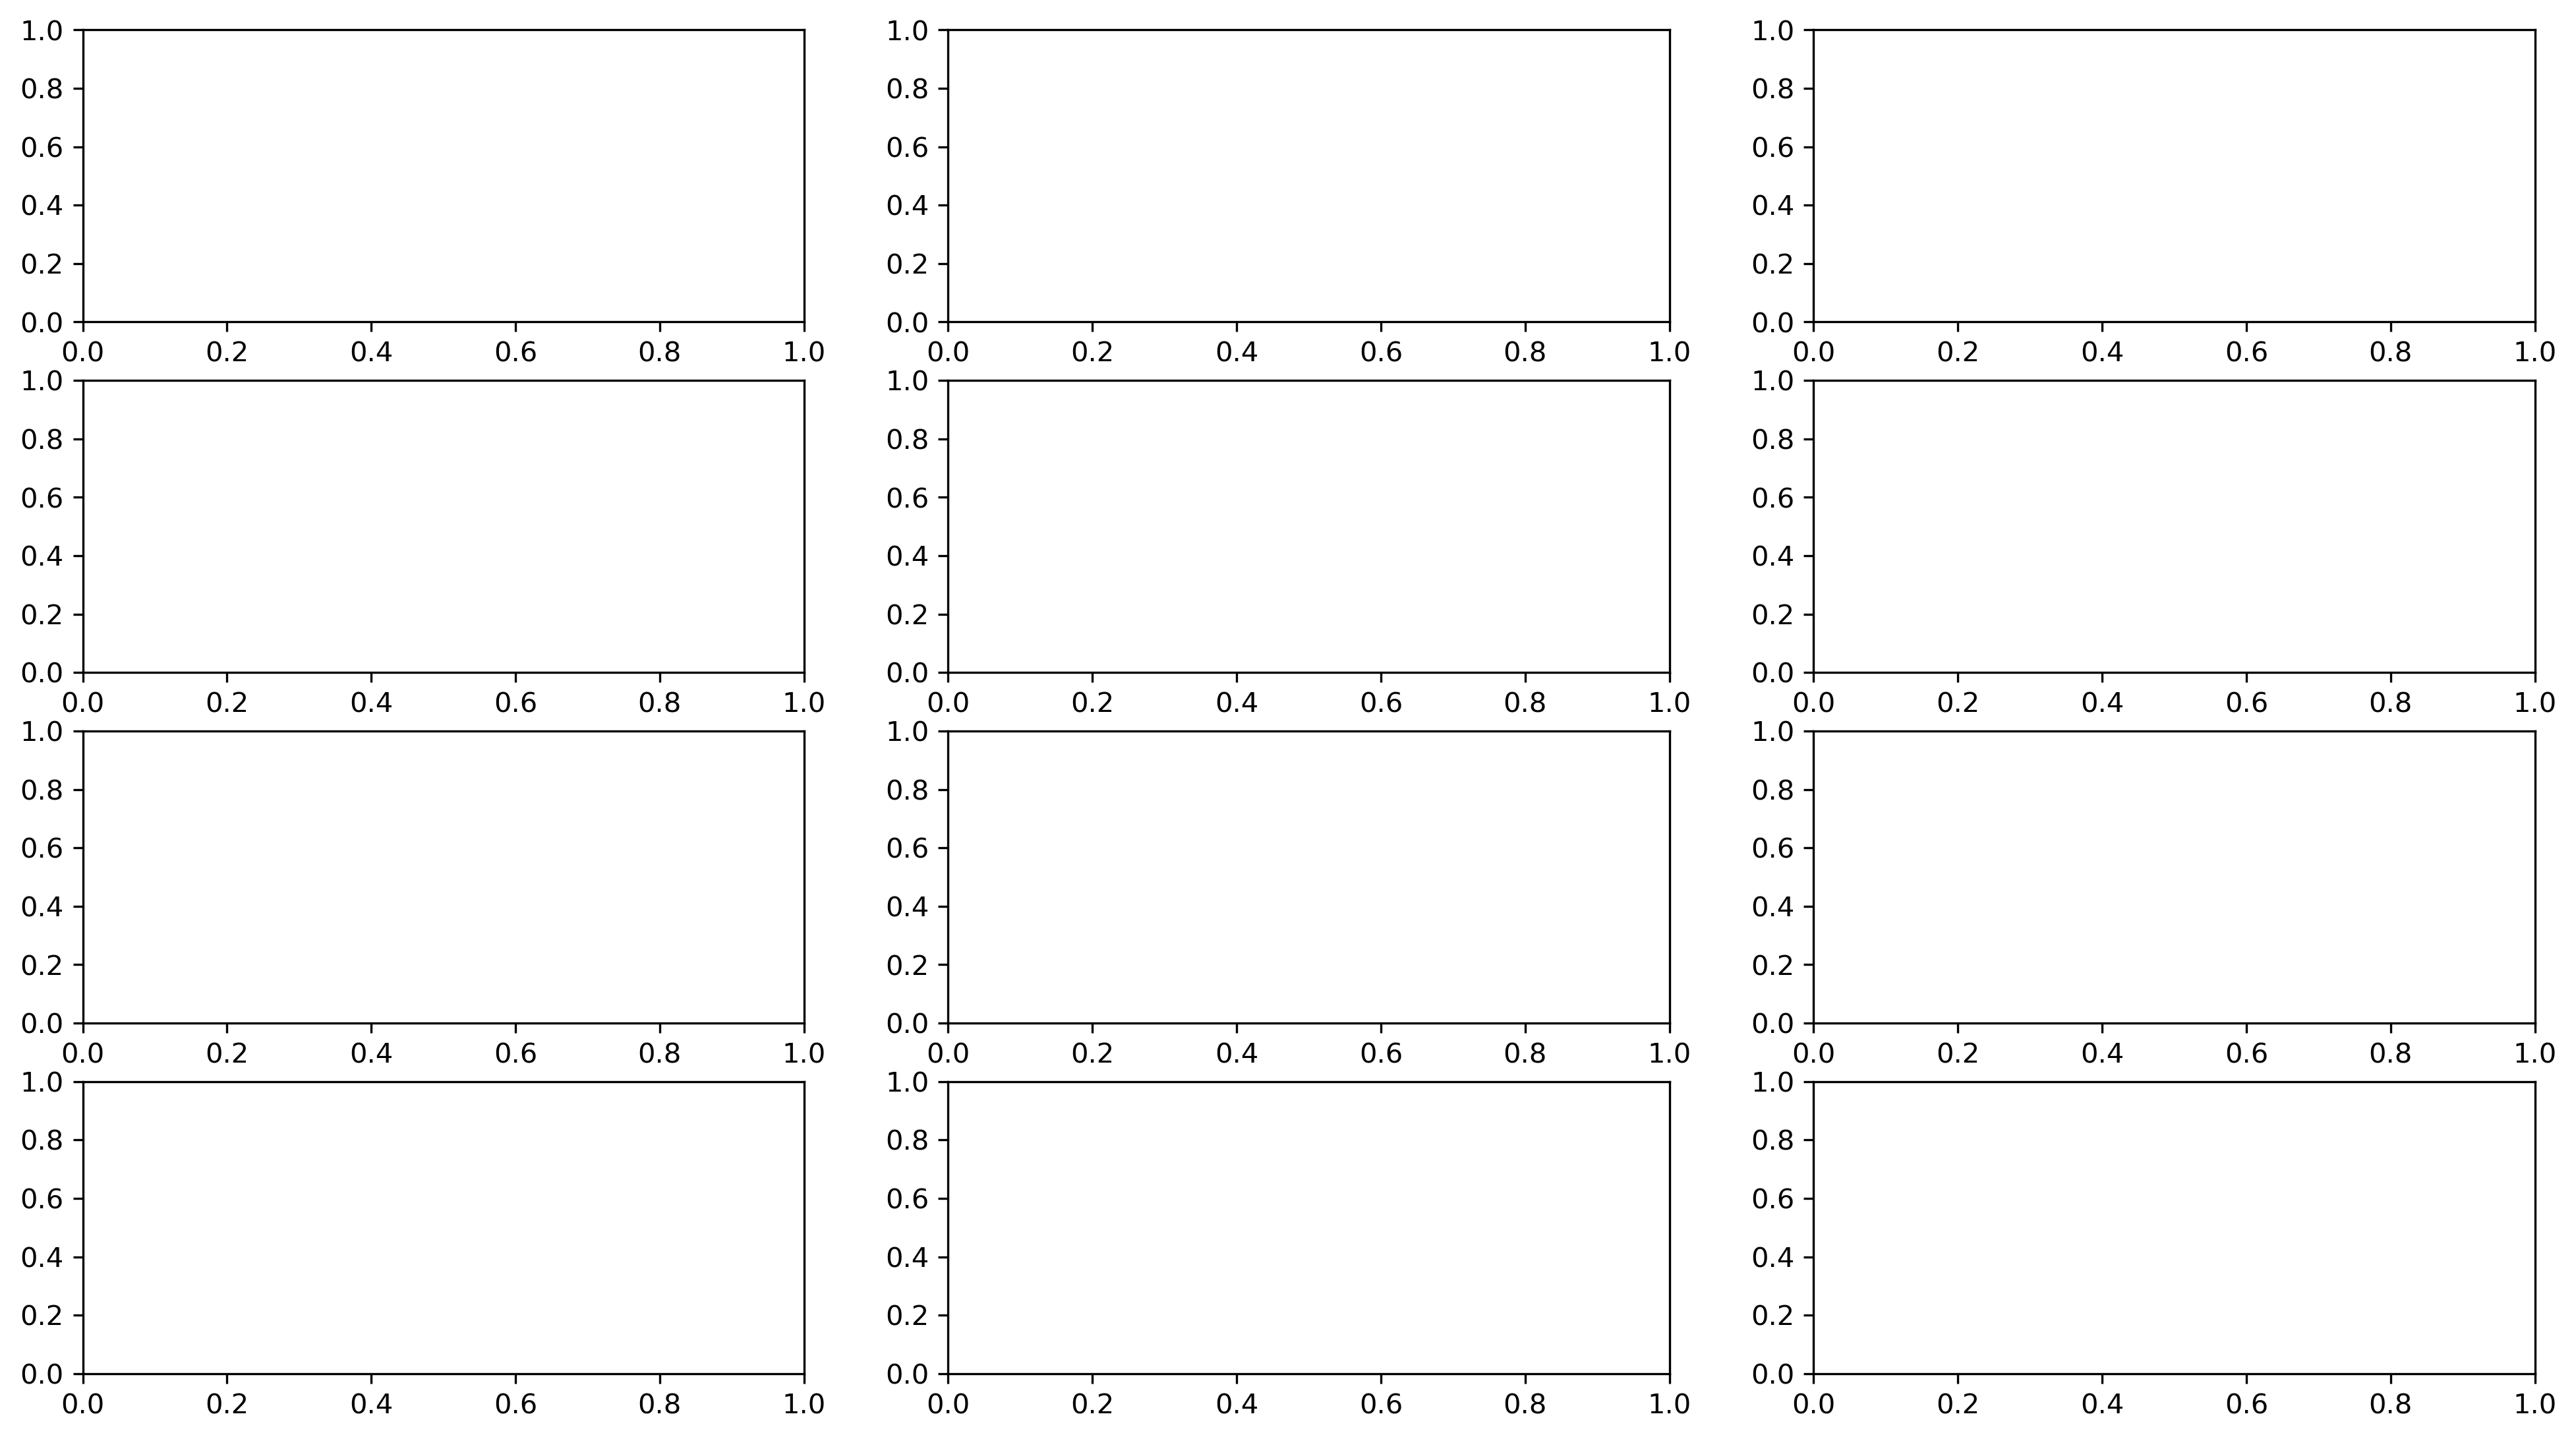

In [22]:
fig, ax0 = plt.subplots(figsize = (16, 9), dpi = 300, nrows = 4, ncols = 3) 

Чтобы эту «сетку» заполнить графиками, нам понадобится цикл `for`. В этом цикле мы будем выполнять две основные операции: создавать оси для каждого графика и добавлять в эти оси нужный вид графика со всеми дополнительными настройками. Тут не обойтись без функции `subplot()` (не путать с `subplots()` ранее). Эта функция создает оси для графика и принимает на вход три агрумента: 

* число строк в сетке с графиками;
* число столбцов в сетке с графиками;
* номер графика в сетке (нумерация начинается с 1, а не с 0, как обычно).

С учетом этих особенностей наша задача сводится к следующему: пронумеровать все месяцы от 1 до 12 (графики с номерами 1-12 в сетке) и для каждого месяца построить гистограмму, выбрав столбец по названию из `temp`. Совместим для этого функцию `enumerate()` и цикл `for`:

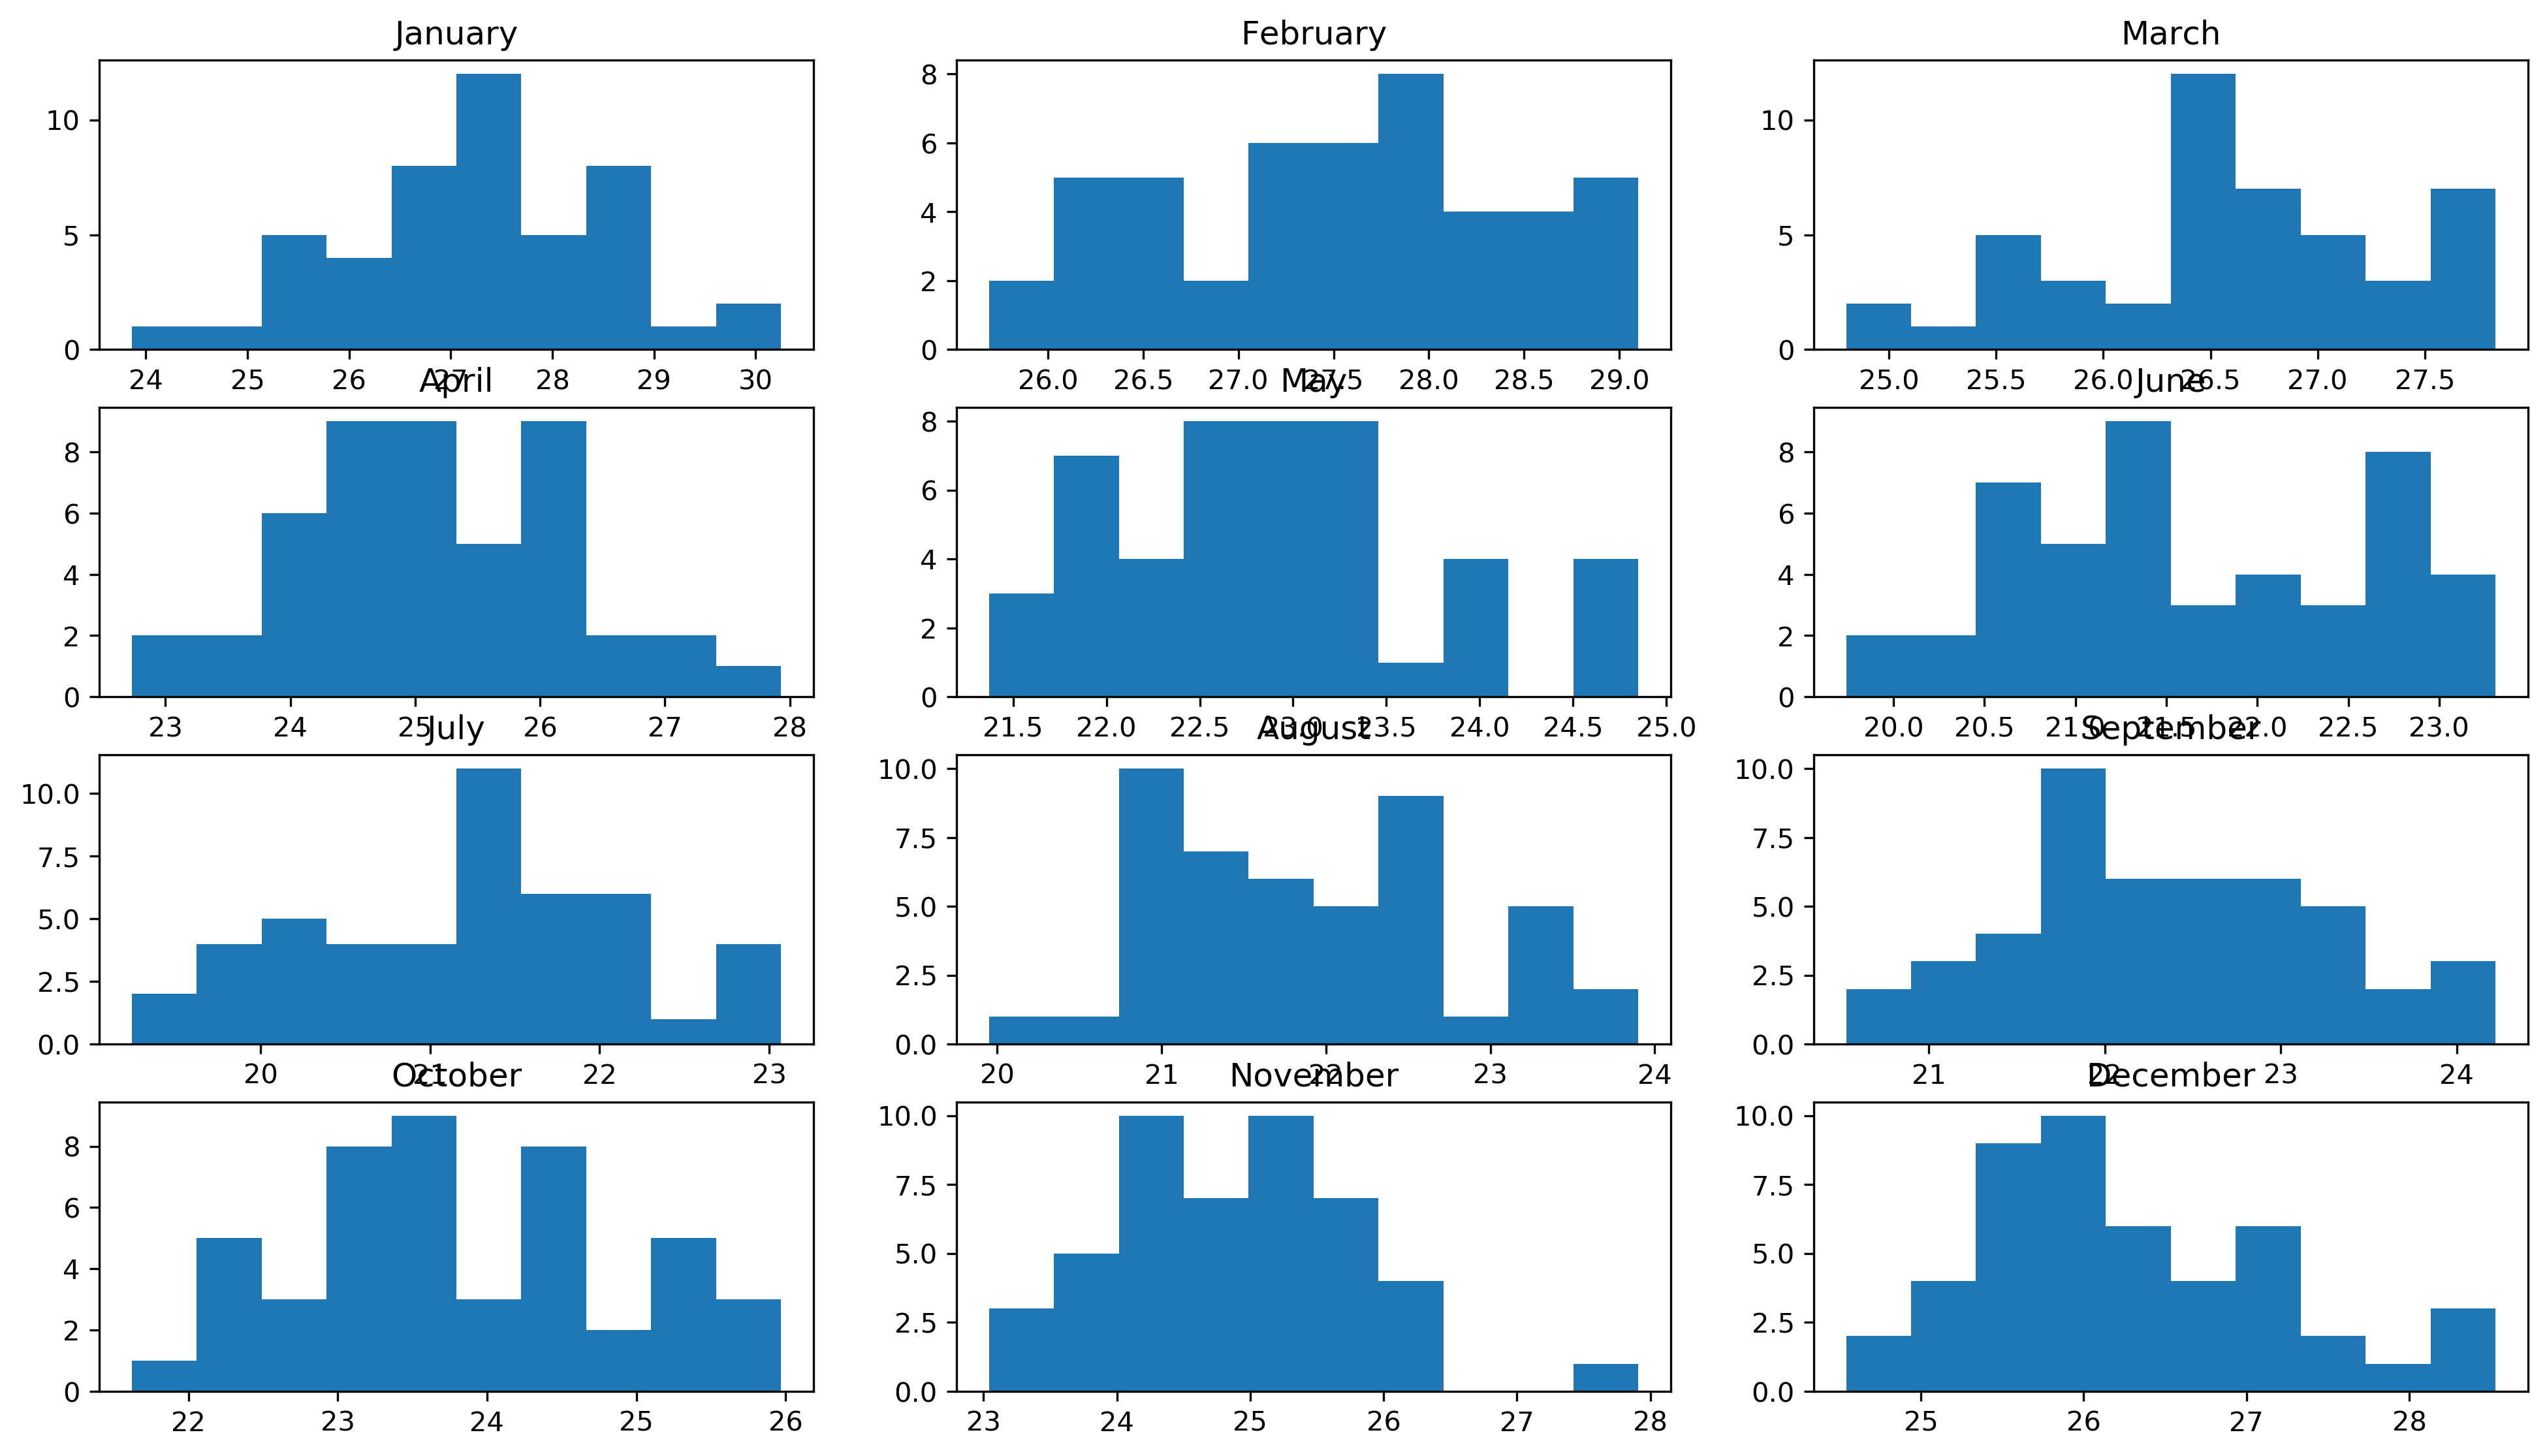

In [23]:
fig, ax0 = plt.subplots(figsize = (16, 9), dpi = 300, nrows = 4, ncols = 3) 

# i, month – индекс месяца (от 0 до 11) и его название (от January до December)
# создаем оси ax на месте i + 1, так нумерация с 1
# в этих осях строим гистограмму + добавляем к ним заголовок по имени месяца

for i, month in enumerate(months):
    ax = plt.subplot(4, 3, i + 1)
    ax.hist(temp[month]) 
    ax.set_title(month) 

Давайте сделаем эти графики более симпатичными, но подойдем к вопросу более содержательно. Например, не просто изменим цвет заливки графиков, а закрепим за каждым временем года свой цвет. Для этого добавим условие на цвет и поместим условные конструкции внутри цикла (у каждого времени года свой цвет, сохраняем его в `col` и подставляем значение `col` в соответствующий аргумент в методе `.hist()`):

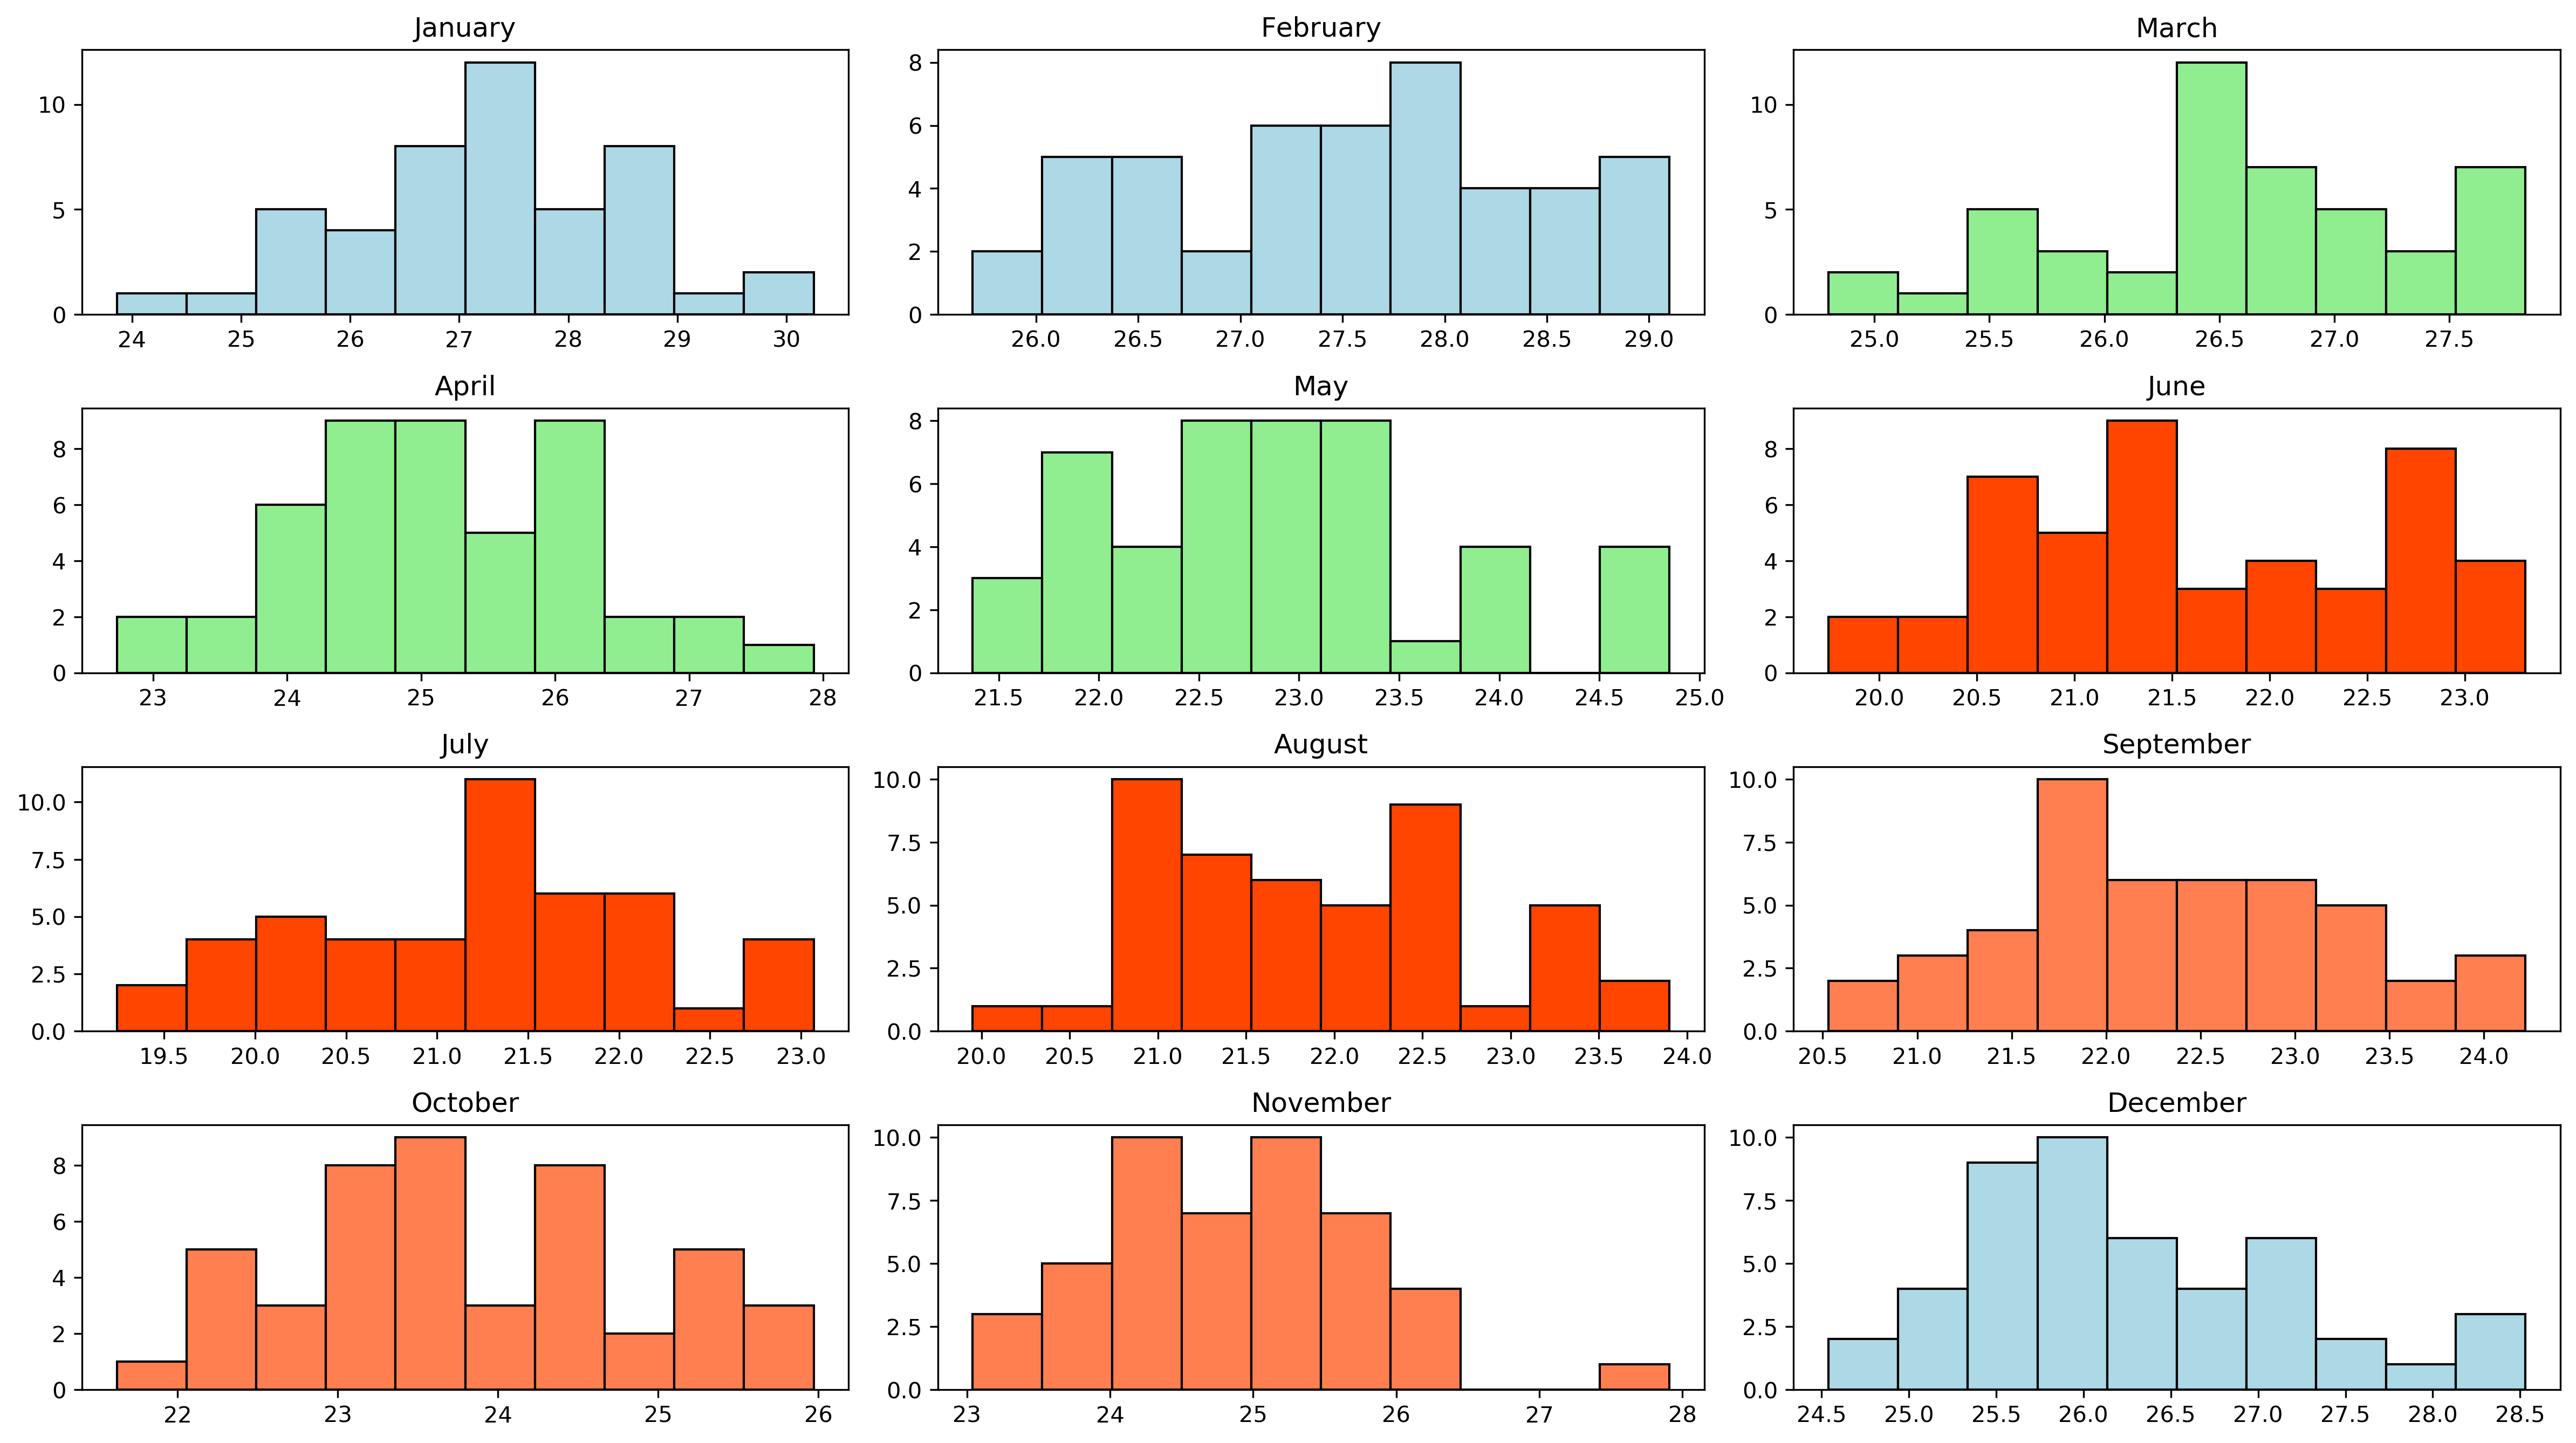

In [24]:
fig, ax0 = plt.subplots(figsize = (16, 9), dpi = 300, nrows = 4, ncols = 3) 

for i, month in enumerate(months):
    ax = plt.subplot(4, 3, i + 1)
    if month in ["January", "February", "December"]:
        col = "lightblue"
    if month in ["March", "April", "May"]:
        col = "lightgreen"
    if month in ["June", "July", "August"]:
        col = "orangered"
    if month in ["September","October", "November"]:
        col = "coral"

    # цвет границ k - от black, b уже занято blue, c'est la vie
    ax.hist(temp[month], edgecolor = "k", color = col) 
    ax.set_title(month) 

# заодно скорректируем расстояние между графиками, 
# чтобы подписи по осям верхнего графика не накладывались на заголовок нижнего

fig.tight_layout(pad = 1)

И еще немного усовершенствуем график – сделаем ширину столбцов гистограмм равной 0.5, добавим к каждому графику одинаковые ограничения по оси X и дорисуем сетку:

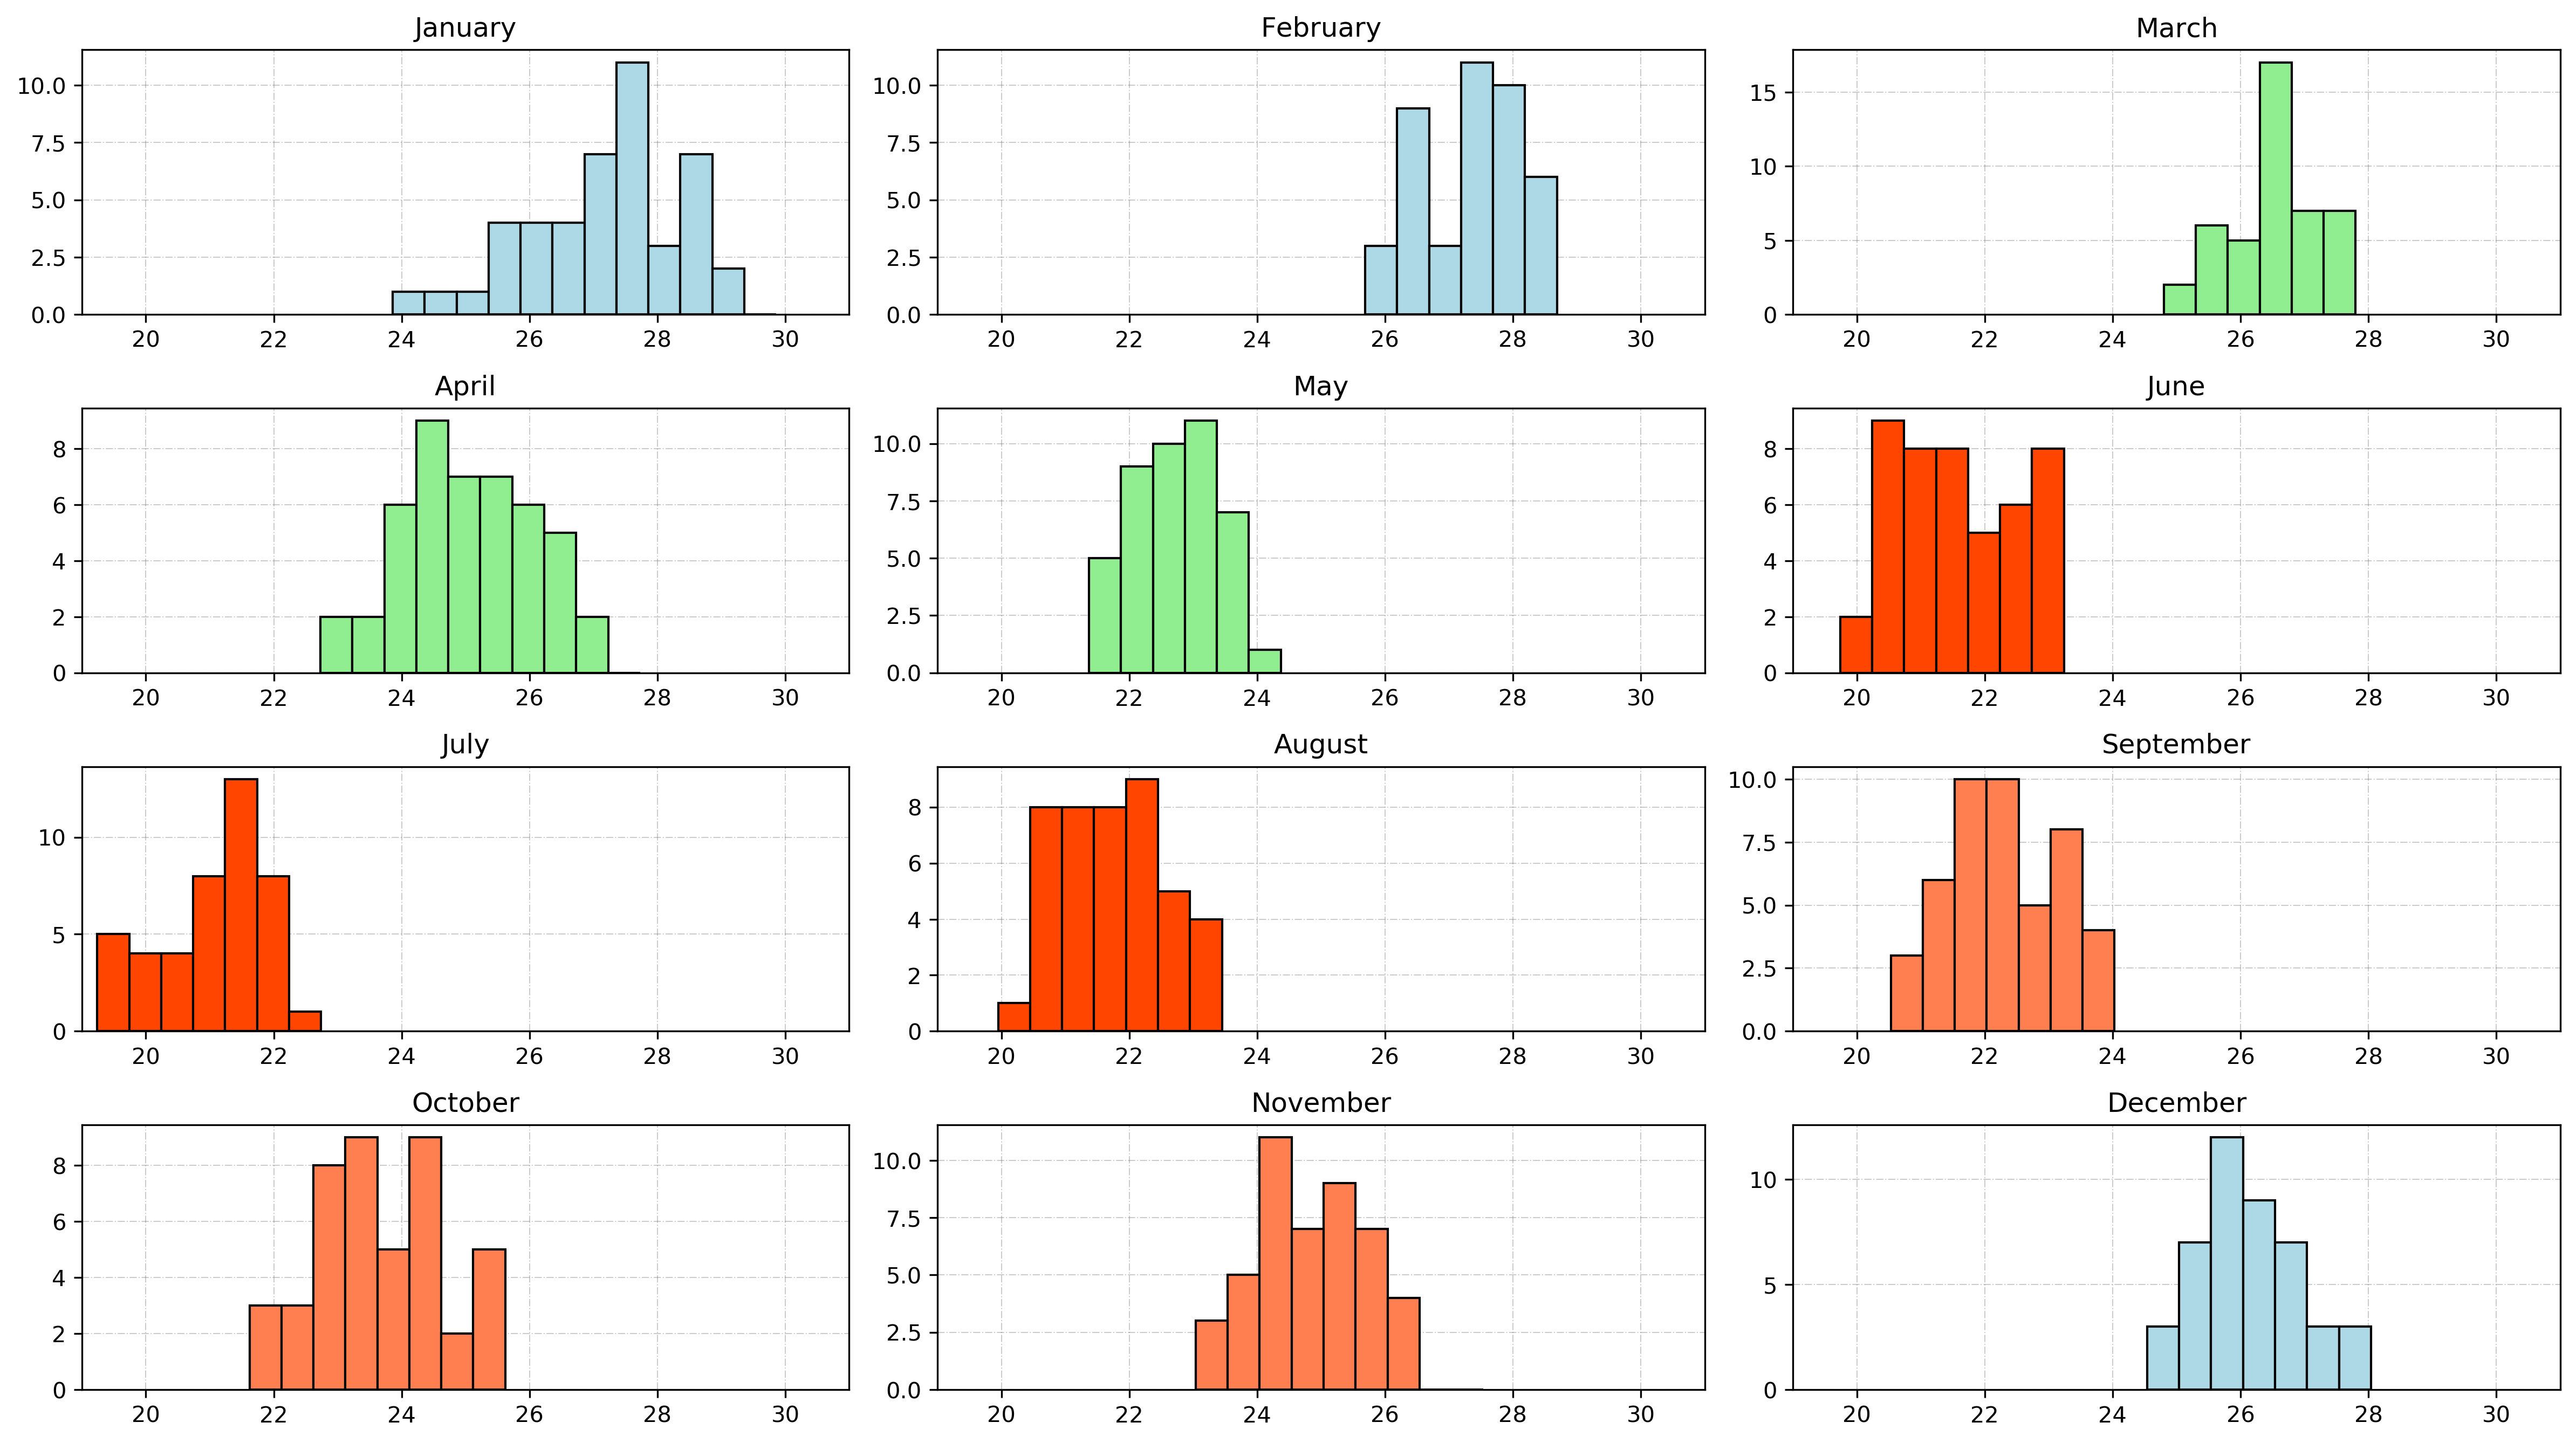

In [25]:
fig, ax0 = plt.subplots(figsize = (16, 9), dpi = 300, nrows = 4, ncols = 3) 

for i, month in enumerate(months):
    ax = plt.subplot(4, 3, i + 1)
    if month in ["January", "February", "December"]:
        col = "lightblue"
    if month in ["March", "April", "May"]:
        col = "lightgreen"
    if month in ["June", "July", "August"]:
        col = "orangered"
    if month in ["September","October", "November"]:
        col = "coral"

    # arange () с min и max – определяем для каждого месяца минимальное и максимальное значение, 
    # чтобы получить набор границ для разбиения на столбцы с шагом 0.5 (у каждого месяца свой)

    ax.hist(temp[month], bins = np.arange(min(temp[month]), max(temp[month]), 0.5), 
          edgecolor = "k", color = col) 

    ax.set_title(month) 
    ax.set_xlim(left = 19, right = 31)

    ax.set_axisbelow(True)
    ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.4)


fig.tight_layout(pad = 1)

Итак, графики почти совершенны, поэтому давайте перейдем к следующей задаче. А задача такая – построить графики по группам, только теперь в предположении, что названия групп у нас есть в самом датафрейме в виде обычного столбца. В рамках наших данных такую ситуацию можно воспроизвести, переведя датафрейм `temp` к другому виду и добавив туда столбец с названием времени года.

Добавим столбец с годом в датафрейм `temp`, просто забрав его из исходного датафрейма `df`:

In [26]:
temp["Year"] = df["YEAR"] 

Вспомним, как выглядит датафрейм `temp`:

In [27]:
temp

,January,February,March,April,May,June,July,August,September,October,November,December,Year
0,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,1973
1,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,1974
2,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,1975
3,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,1976
4,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,1977
5,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66,1978
6,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02,1979
7,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01,1980
8,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73,1981
9,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98,1982


Для дальнейшей работы нам понадобится датафрейм с другой структурой – таблица с тремя столбцами *год*, *месяц*, *температура*, где одна строка содержит температуру воздуха в конкретный месяц в конкретный год. Для получения такой таблицы нам понадобится преобразование, которое называется переходом от широкого формата датафрейма (*wide format*) к длинному формату датафрейма (*long format*). Его можно осуществить с помощью функции `melt()`, она транспонирует каждую строчку таблицы:

In [28]:
# id_vars: столбцы, по которым будут растягиваться данные
# value_vars: столбцы, по которым собираем данные
# каждый год растягиваем на 12 месяцев
# сложно воспримается, проще сравнить было-стало

pd.melt(temp, id_vars = ["Year"], value_vars = months)

,Year,variable,value
0,1973,January,27.73
1,1974,January,26.68
2,1975,January,25.27
3,1976,January,27.48
4,1977,January,27.13
...,...,...,...
559,2015,December,28.38
560,2016,December,27.22
561,2017,December,27.01
562,2018,December,27.55


Сохраним результат преобразования в датафрейм `new`, добавив содержательные названия столбцов вместо `variable` и `value`:

In [29]:
new = pd.melt(temp, id_vars = ["Year"], 
        value_vars = months, var_name = "Month", value_name = "Temp")

In [30]:
# простая сортировка тут не очень, месяцы сортируются не хронологически, а по алфавиту
# но нам пока хронологический порядок не нужен, just to note

new.sort_values("Year")

,Year,Month,Temp
0,1973,January,27.73
470,1973,November,23.06
376,1973,September,21.46
423,1973,October,22.46
235,1973,June,22.76
...,...,...,...
140,2019,March,27.50
93,2019,February,28.05
46,2019,January,30.25
516,2019,November,25.61


Напишем функцию для определения времени года и применим ее через метод `.apply()` к столбцу с названиями месяцев:

In [31]:
def to_season(x):
    if x in ["January", "February", "December"]:
        r = "Winter"
    if x in ["March", "April", "May"]:
        r = "Spring"
    if x in ["June", "July", "August"]:
        r = "Summer"
    if x in  ["September","October", "November"]:
        r = "Autumn"
    return r

In [32]:
new["Season"] = new["Month"].apply(to_season) 
new

,Year,Month,Temp,Season
0,1973,January,27.73,Winter
1,1974,January,26.68,Winter
2,1975,January,25.27,Winter
3,1976,January,27.48,Winter
4,1977,January,27.13,Winter
...,...,...,...,...
559,2015,December,28.38,Winter
560,2016,December,27.22,Winter
561,2017,December,27.01,Winter
562,2018,December,27.55,Winter


Так как далее нам придется группировать строки по времени года, давайте вспомним, как выглядит результат группировки данных через `.groupby()`:

In [33]:
list(new.groupby("Season"))

[('Autumn',      Year      Month   Temp  Season
  376  1973  September  21.46  Autumn
  377  1974  September  22.91  Autumn
  378  1975  September  22.40  Autumn
  379  1976  September  21.27  Autumn
  380  1977  September  22.44  Autumn
  ..    ...        ...    ...     ...
  512  2015   November  26.43  Autumn
  513  2016   November  24.78  Autumn
  514  2017   November  25.47  Autumn
  515  2018   November  25.61  Autumn
  516  2019   November  25.61  Autumn
  
  [141 rows x 4 columns]), ('Spring',      Year  Month   Temp  Season
  94   1973  March  25.70  Spring
  95   1974  March  26.56  Spring
  96   1975  March  26.43  Spring
  97   1976  March  25.55  Spring
  98   1977  March  26.88  Spring
  ..    ...    ...    ...     ...
  230  2015    May  23.18  Spring
  231  2016    May  22.93  Spring
  232  2017    May  22.57  Spring
  233  2018    May  23.81  Spring
  234  2019    May  24.85  Spring
  
  [141 rows x 4 columns]), ('Summer',      Year   Month   Temp  Season
  235  1973  

Метод `groupby()` возвращает список пар из названий группы и строк, которые ему соответствуют (текстовая строка и маленький датафрейм для каждой группы). Пользуясь этим удобным результатом и циклом `for`, мы сможем построить графики для каждого времени года. Для этого нужно вспомнить предыдущий пример с `subplot()` и учесть, что здесь нам нужен не только номер графика, но и название группы вместе с датафреймом, ей соответствующим:

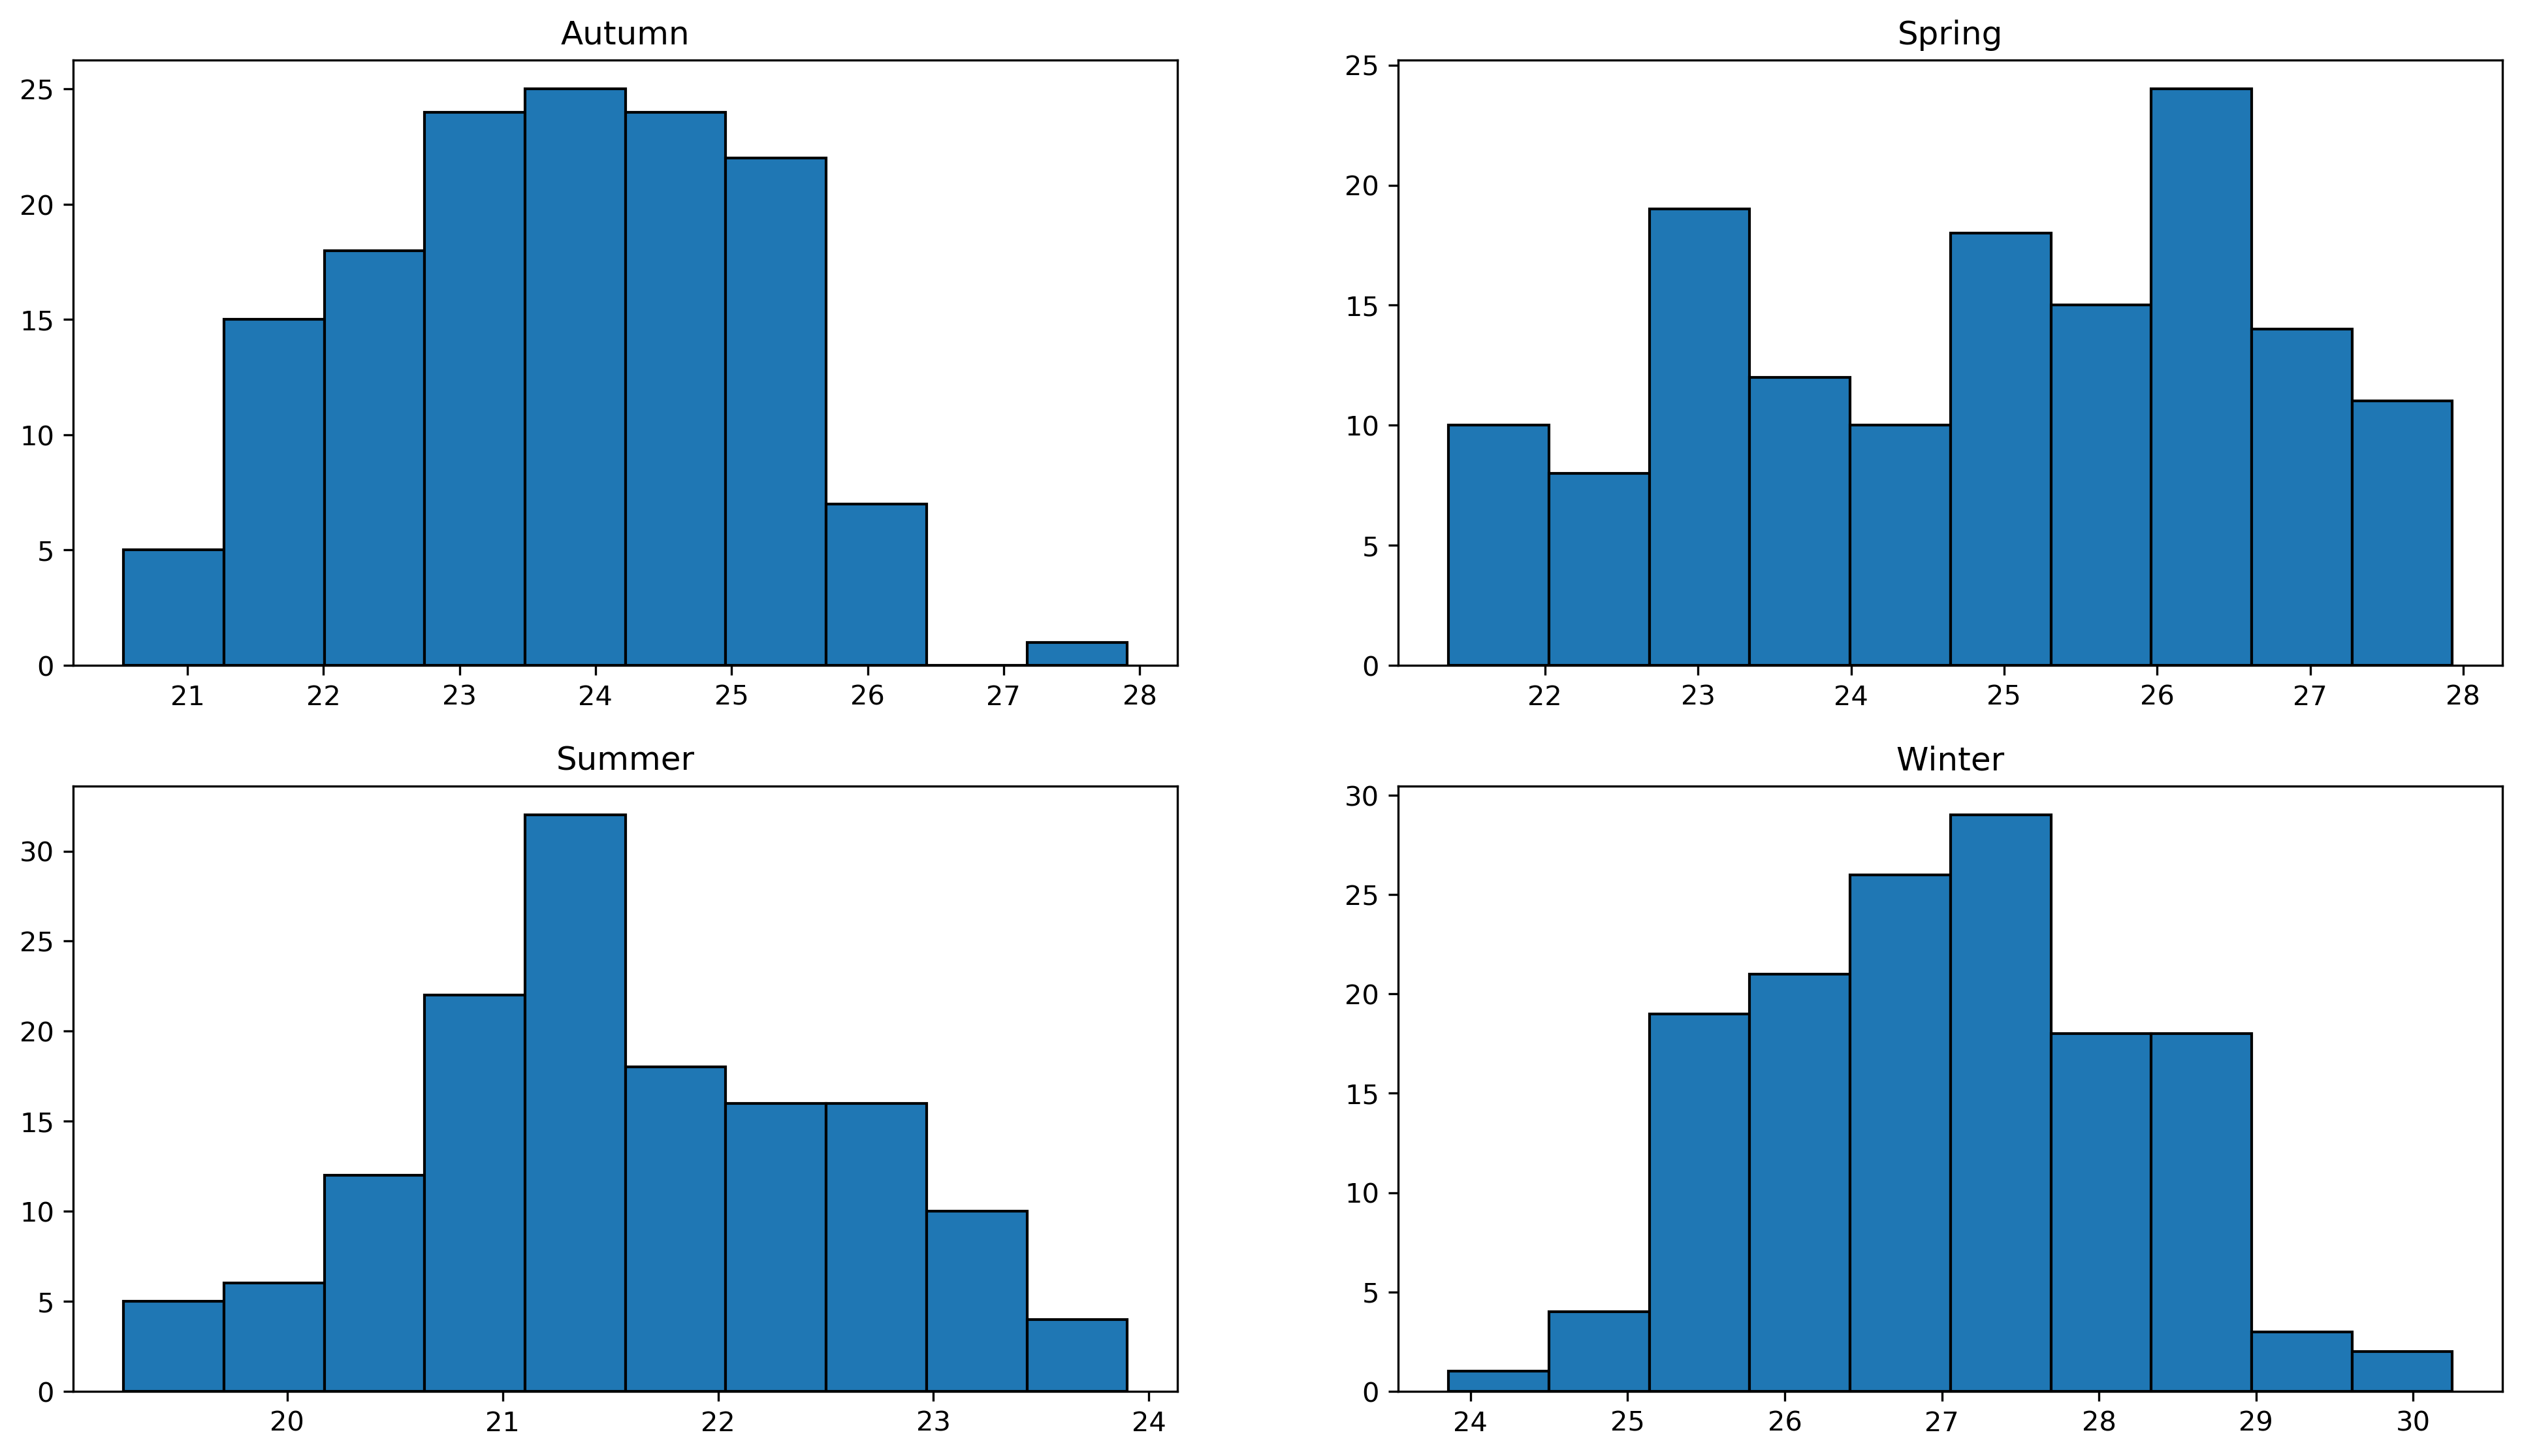

In [34]:
# четыре сезона, график 2 на 2

fig, ax0 = plt.subplots(figsize = (16, 9), dpi = 300, nrows = 2, ncols = 2) 

# если непонятно, что есть что, запустите в отдельной ячейке
# for i, (group, data) in enumerate(new.groupby("Season")):
  # print(i, group, data)

for i, (group, data) in enumerate(new.groupby("Season")):
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(data["Temp"], edgecolor = "k")
    ax.set_title(group)

Готово! При желании графики можно еще доработать, как изменять цвета и другие настройки, характерные для гистограмм, мы уже знаем.